In [272]:
import pandas as pd                         # import some library files
import numpy as np
import pickle
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

We have dataset with 36 folder and each folder contain 1016 image files.<br>
So first we will convert the data into the pickle file to make it easy. <br>
Please Do not run this box because we already save the data into pickle file.

In [265]:
# # List of images
# data = []
# # List of labels
# labels = []
# input_path = 'dataset'
# # Load all directory
# for root, dirs, files in os.walk(input_path):
#     # Filter every folder
#     for dir in dirs:
#         print(" Class : \t \t " + dir)
#         # Filter all files in the directory
#         for filename in os.listdir(input_path + "/" + dir):
#             # Make sure that our file is text
#             if filename.endswith('.jpg'):
#                 img = cv2.imread(input_path + "/" + dir + "/" + filename)

#                 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                 data.append(gray)
#                 labels.append(dir)

# # Save test data and labels
# pickle.dump(data, open("data.pickle", "wb"))
# pickle.dump(labels, open("labels.pickle", "wb"))

# print('Length data : ' + str(len(data)))
# print('Length labels : ' + str(len(labels)))
# print('Processs finished !')


 Class : 	 	 0
 Class : 	 	 1
 Class : 	 	 2
 Class : 	 	 3
 Class : 	 	 4
 Class : 	 	 5
 Class : 	 	 6
 Class : 	 	 7
 Class : 	 	 8
 Class : 	 	 9
 Class : 	 	 A
 Class : 	 	 B
 Class : 	 	 C
 Class : 	 	 D
 Class : 	 	 E
 Class : 	 	 F
 Class : 	 	 G
 Class : 	 	 H
 Class : 	 	 I
 Class : 	 	 J
 Class : 	 	 K
 Class : 	 	 L
 Class : 	 	 M
 Class : 	 	 N
 Class : 	 	 O
 Class : 	 	 P
 Class : 	 	 Q
 Class : 	 	 R
 Class : 	 	 S
 Class : 	 	 T
 Class : 	 	 U
 Class : 	 	 V
 Class : 	 	 W
 Class : 	 	 X
 Class : 	 	 Y
 Class : 	 	 Z
Length data : 36576
Length labels : 36576
Processs finished !


Load the data and convert the data into array.

In [270]:
data = pickle.load(open("data.pickle","rb"))
labels = pickle.load(open("labels.pickle","rb"))

In [271]:
data = np.array(data)
labels = np.array(labels)

# Exploratory Data Analysis

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


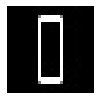

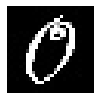

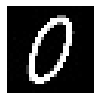

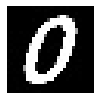

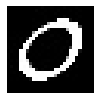

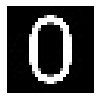

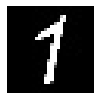

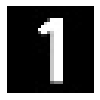

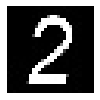

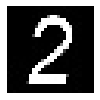

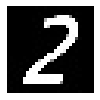

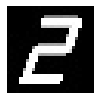

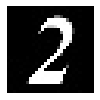

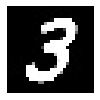

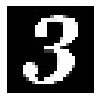

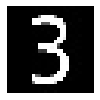

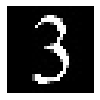

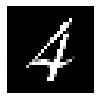

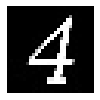

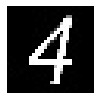

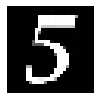

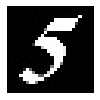

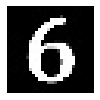

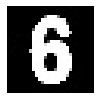

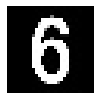

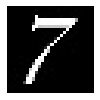

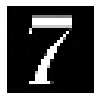

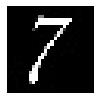

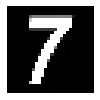

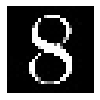

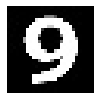

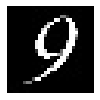

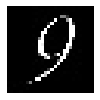

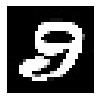

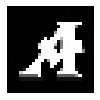

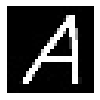

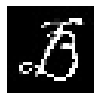

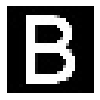

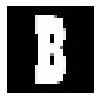

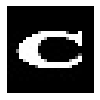

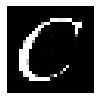

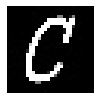

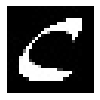

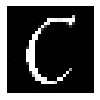

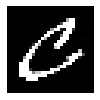

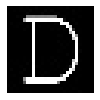

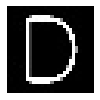

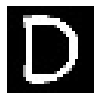

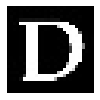

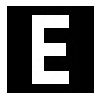

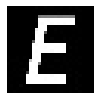

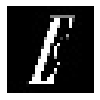

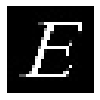

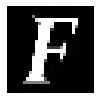

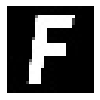

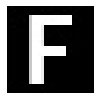

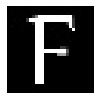

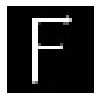

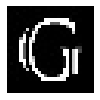

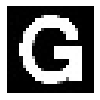

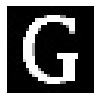

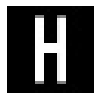

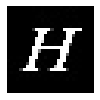

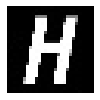

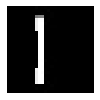

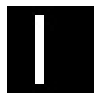

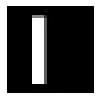

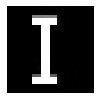

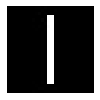

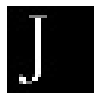

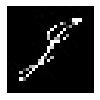

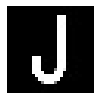

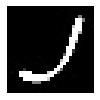

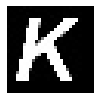

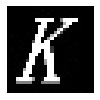

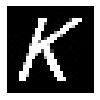

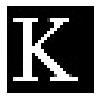

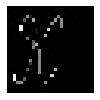

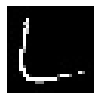

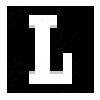

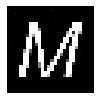

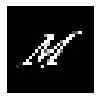

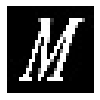

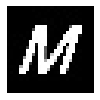

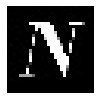

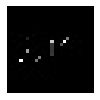

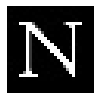

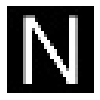

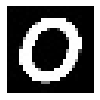

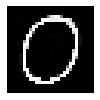

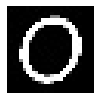

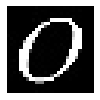

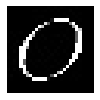

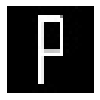

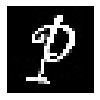

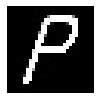

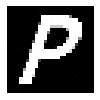

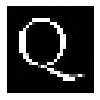

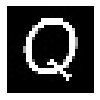

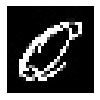

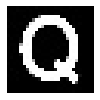

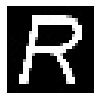

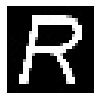

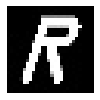

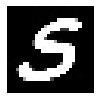

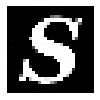

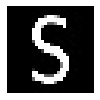

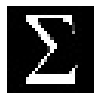

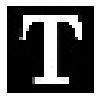

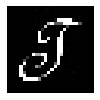

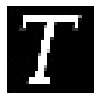

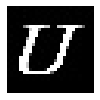

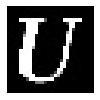

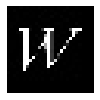

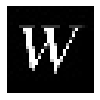

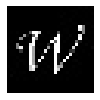

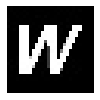

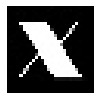

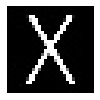

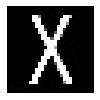

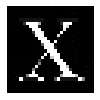

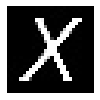

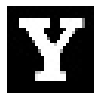

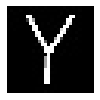

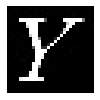

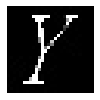

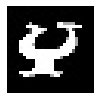

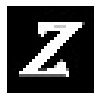

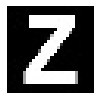

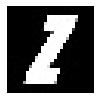

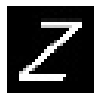

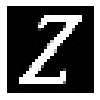

In [269]:
#Visulize the data
for i in range(0,36575,200):
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.1, 0.2, 0.8])
    ax1.set_axis_off()
    ax1.imshow(data[i],cmap="gray")
    fig.show()

In [254]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


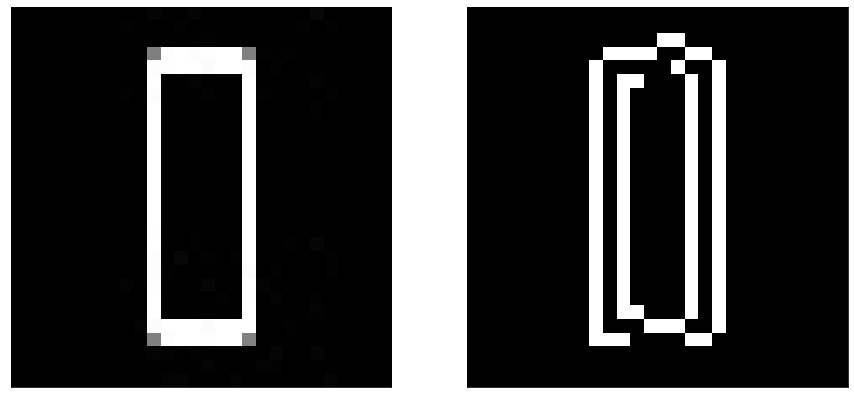

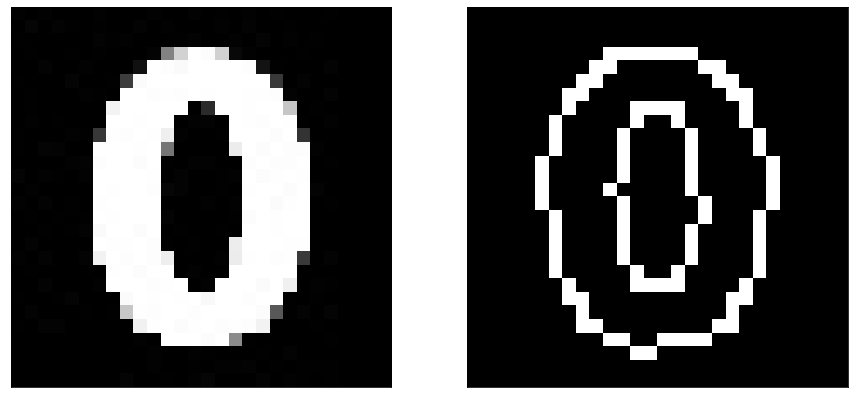

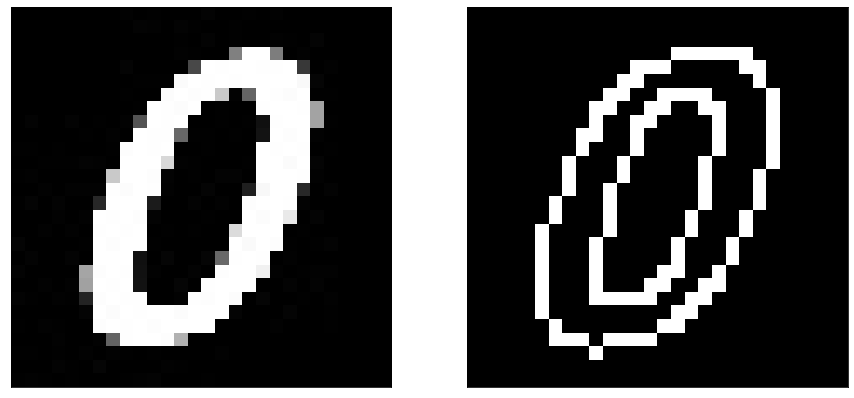

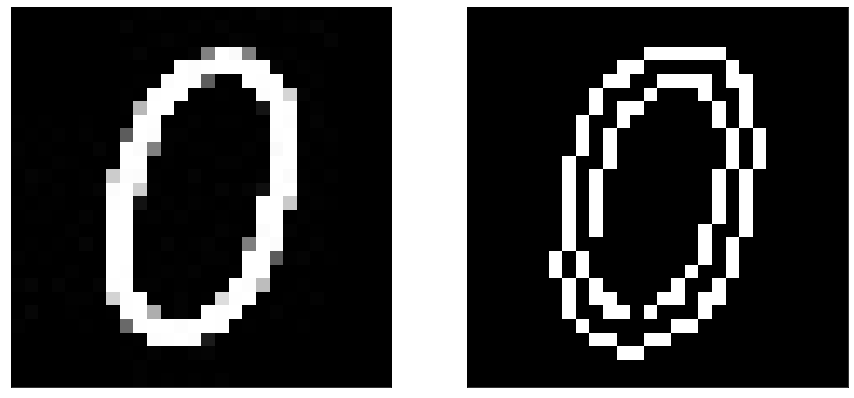

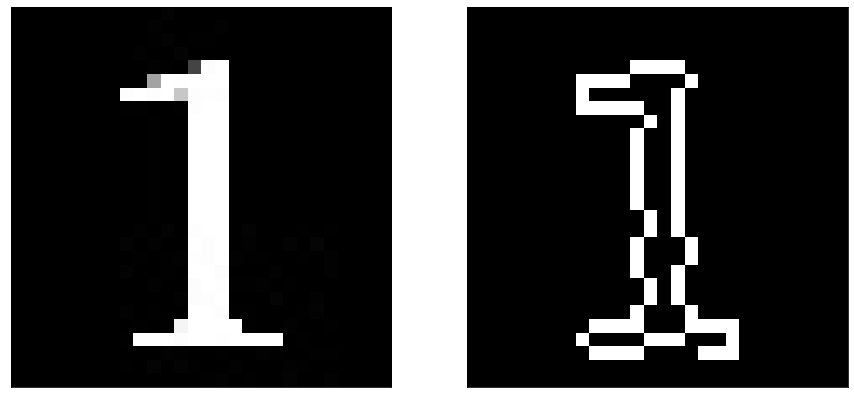

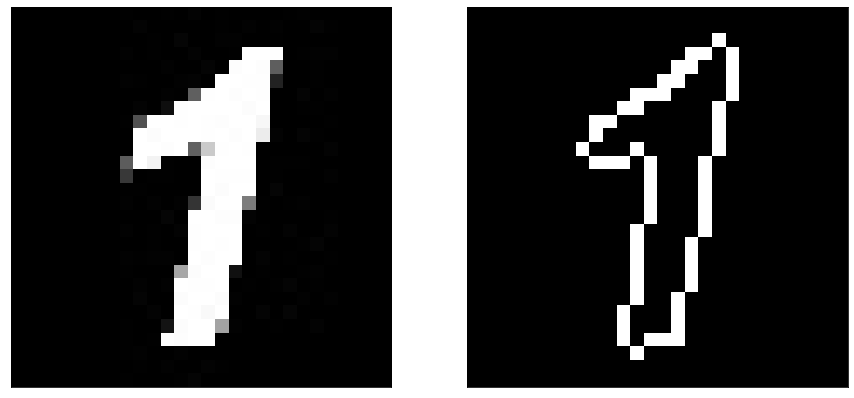

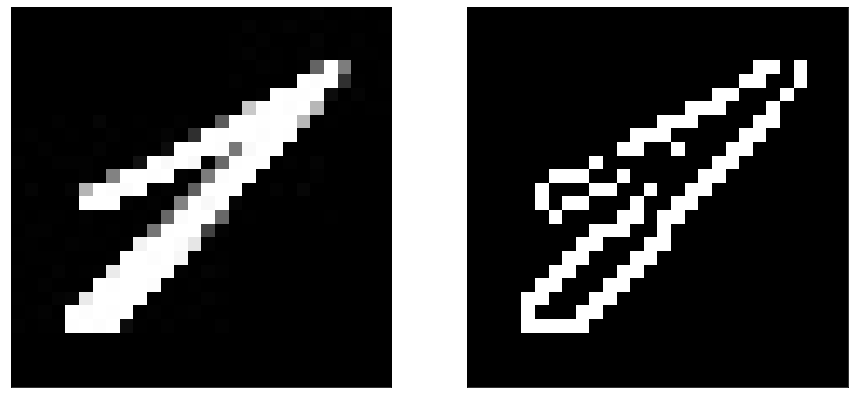

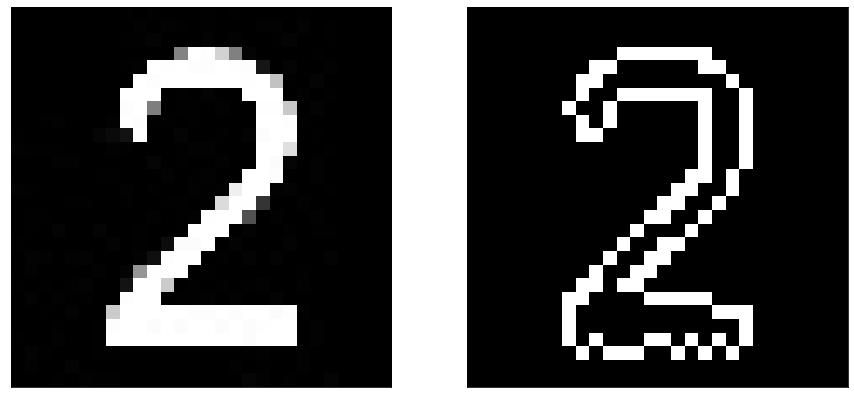

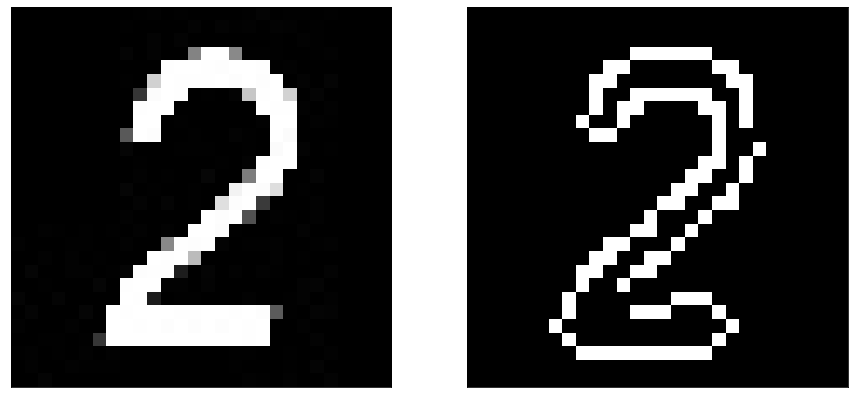

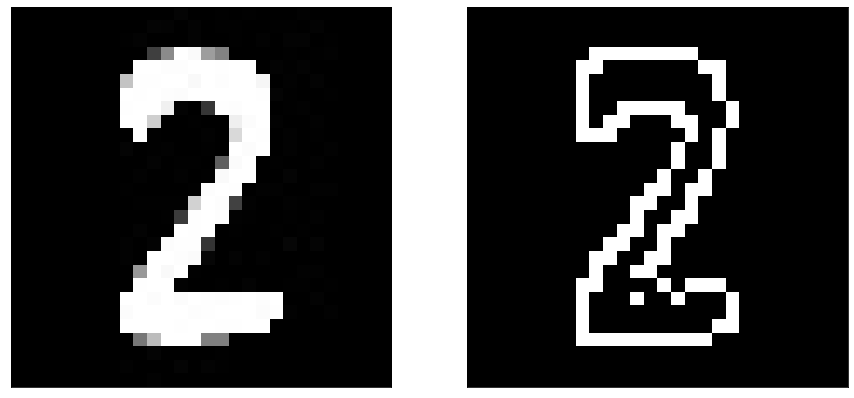

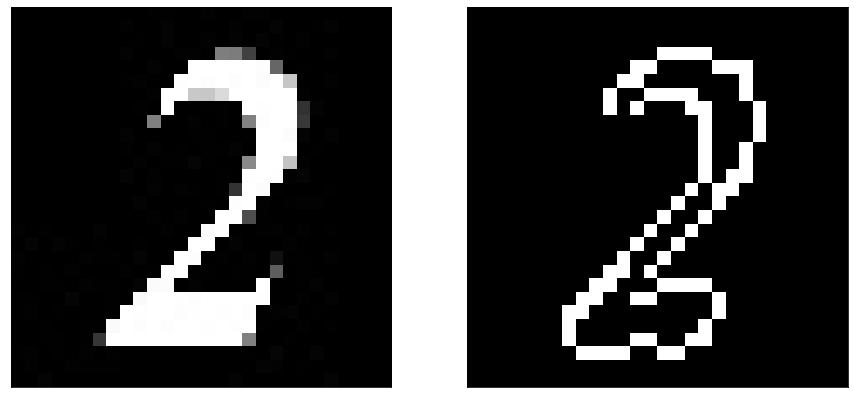

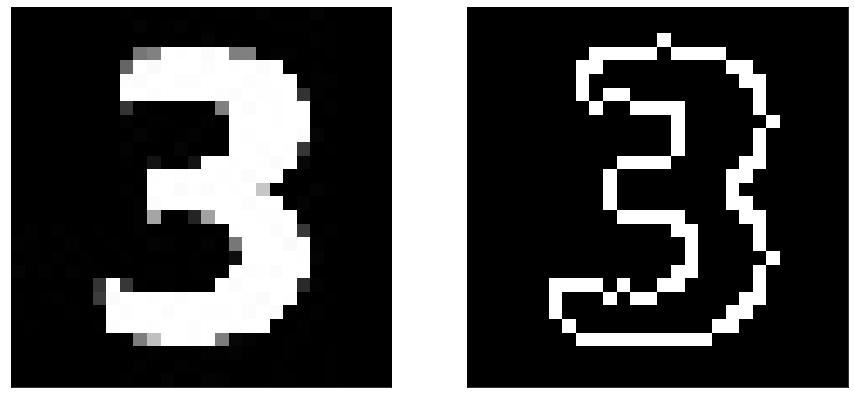

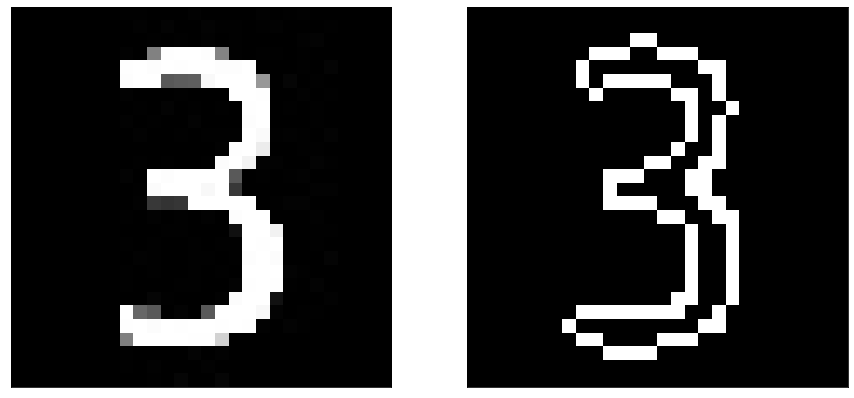

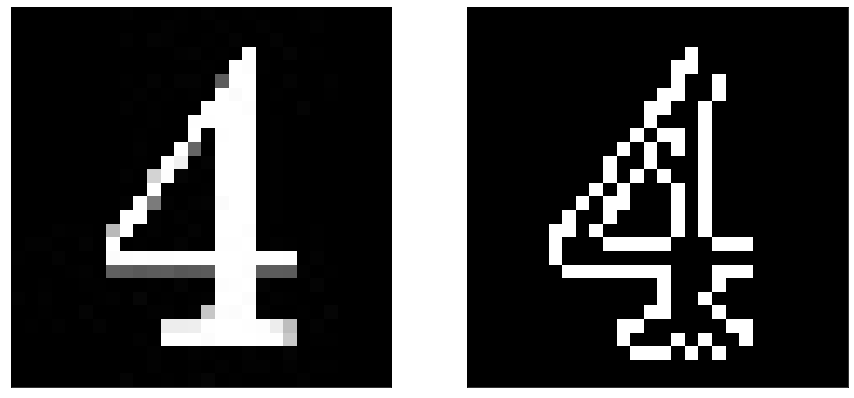

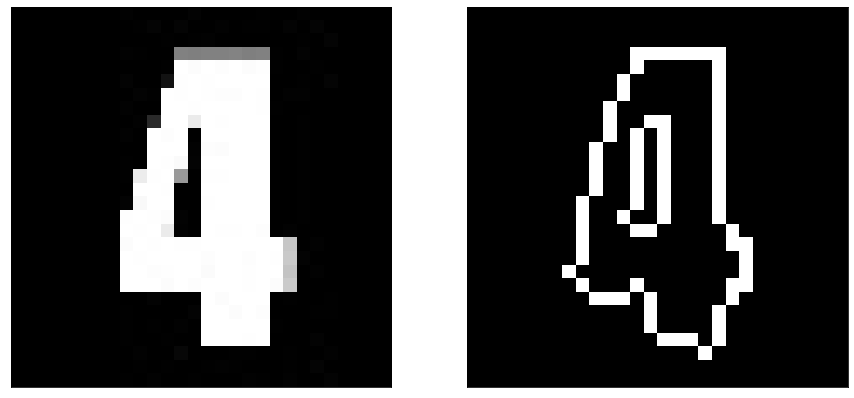

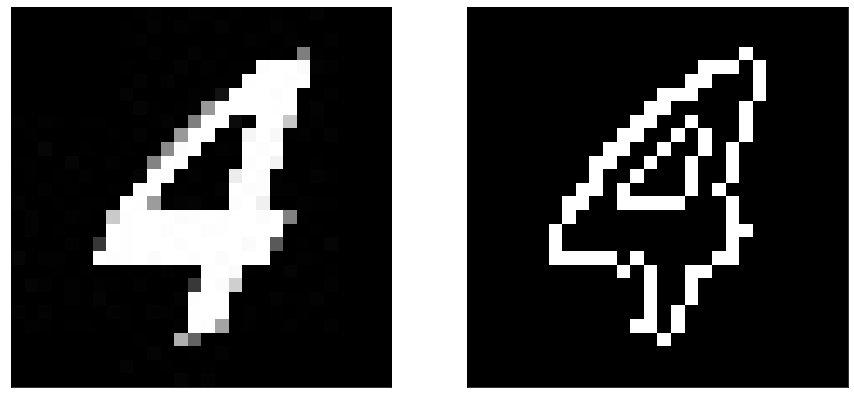

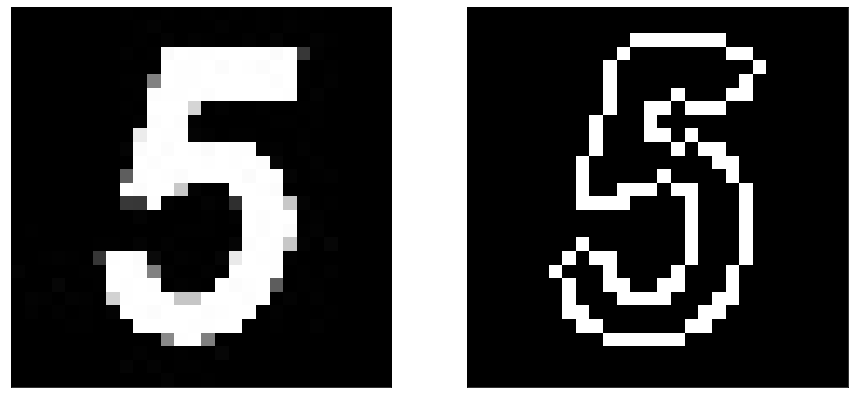

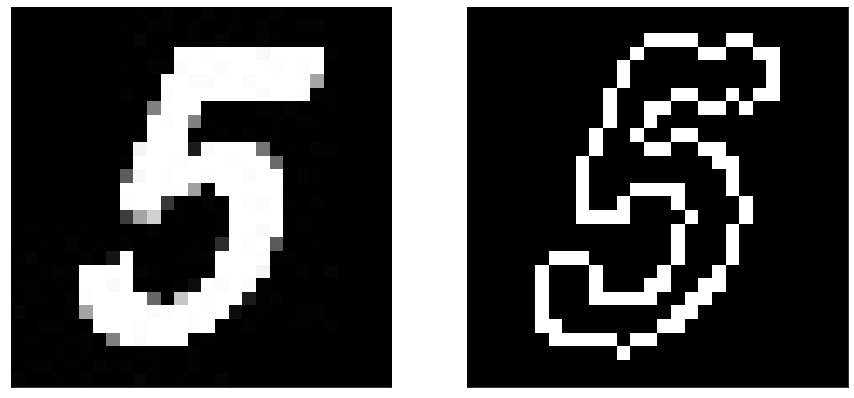

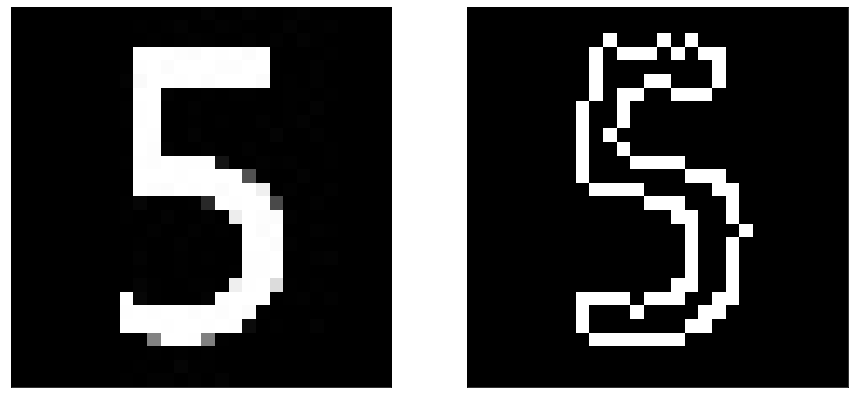

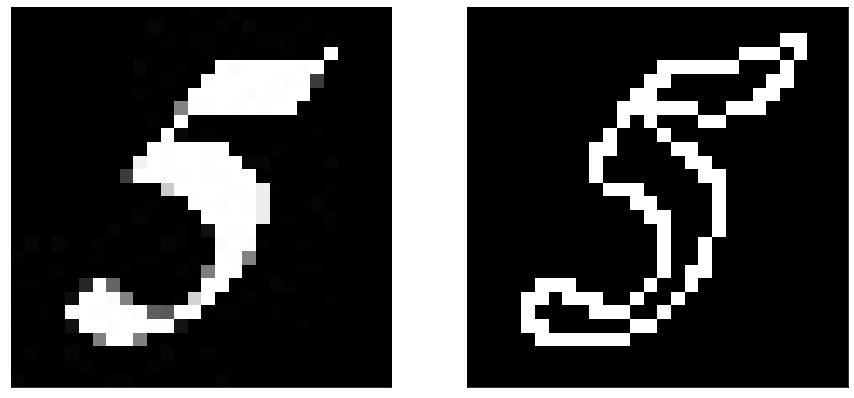

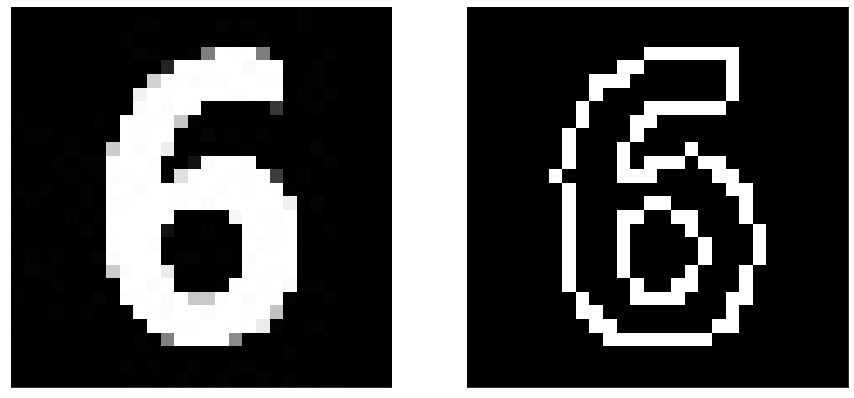

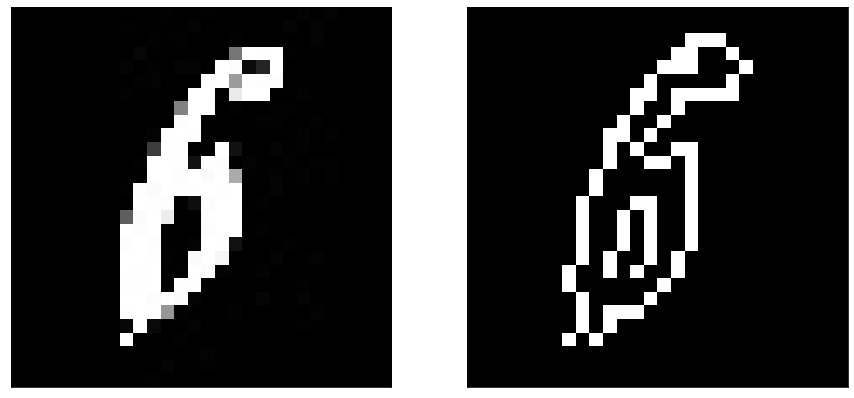

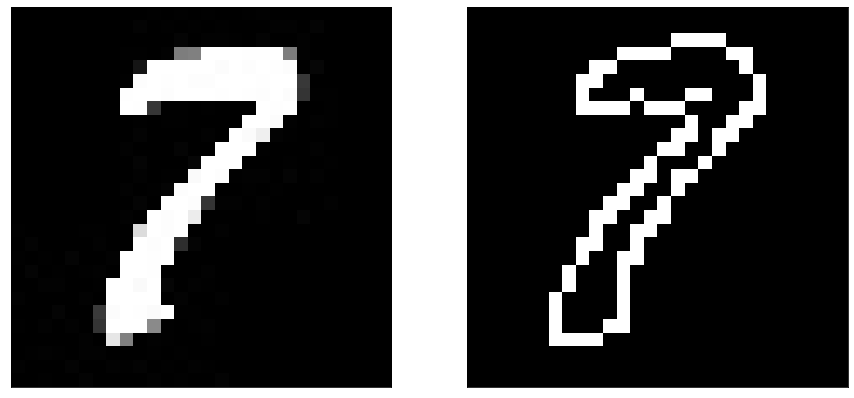

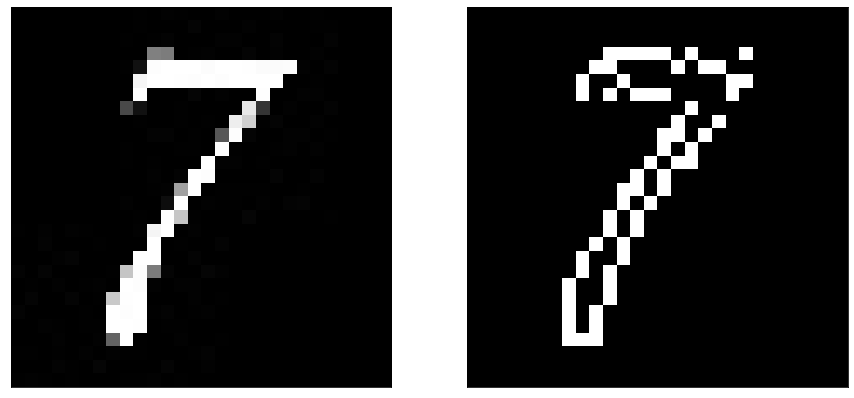

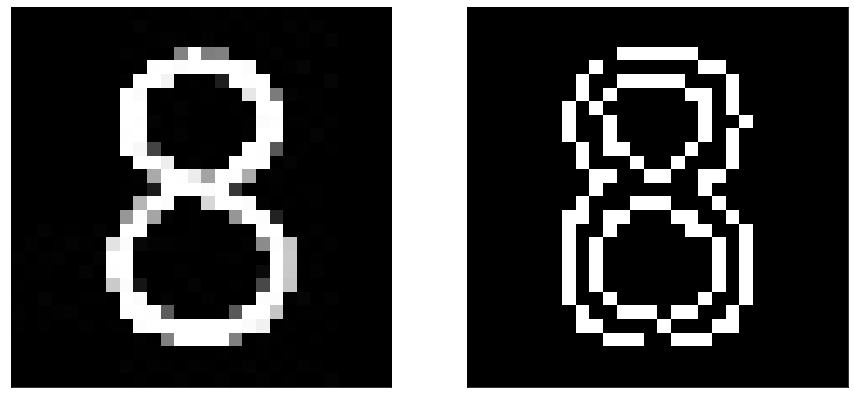

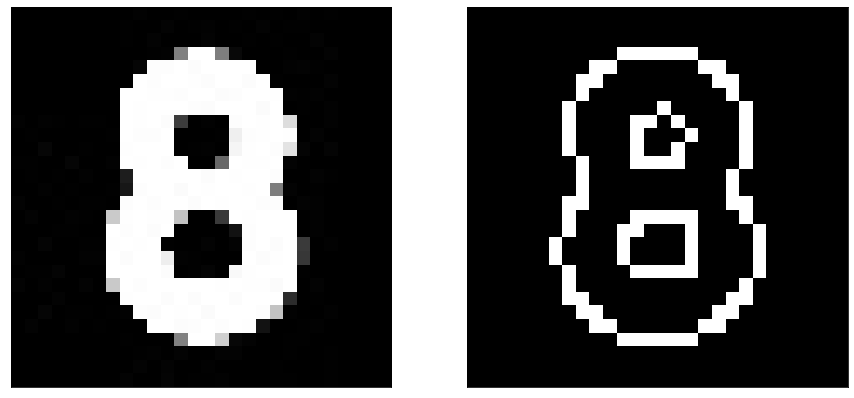

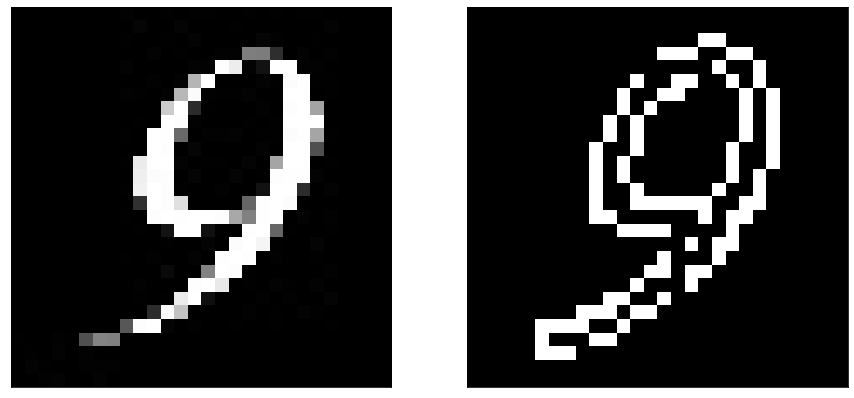

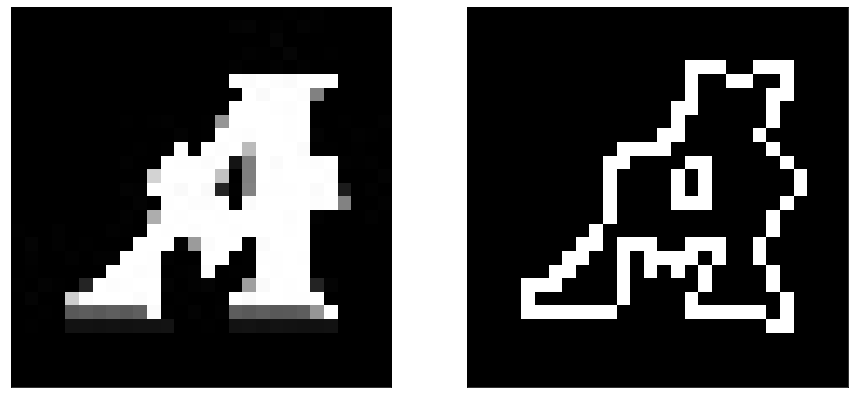

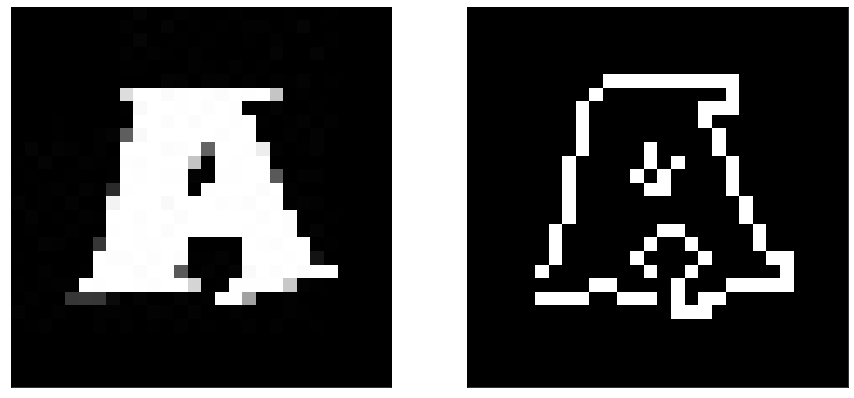

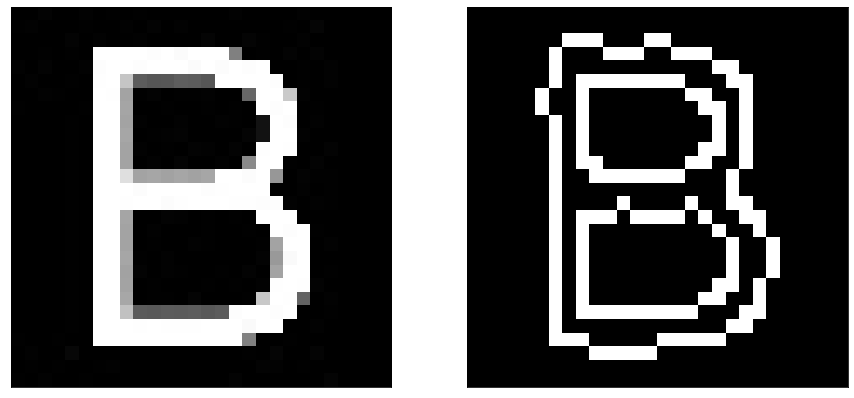

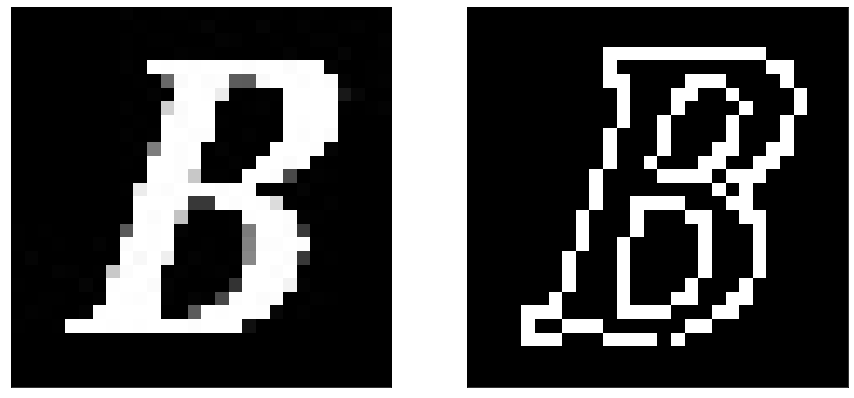

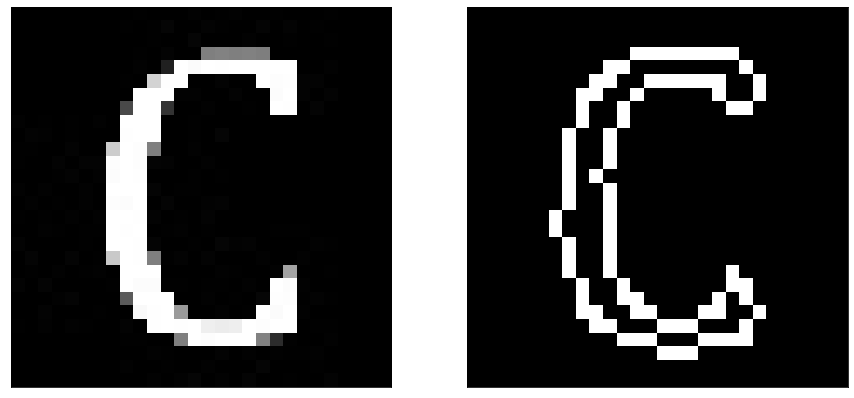

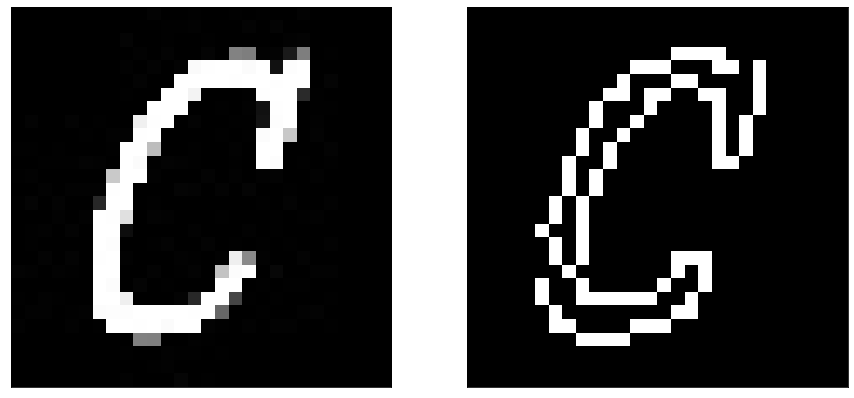

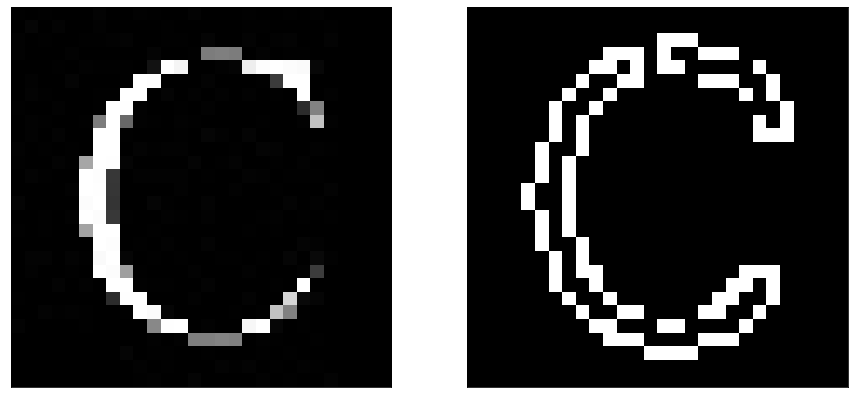

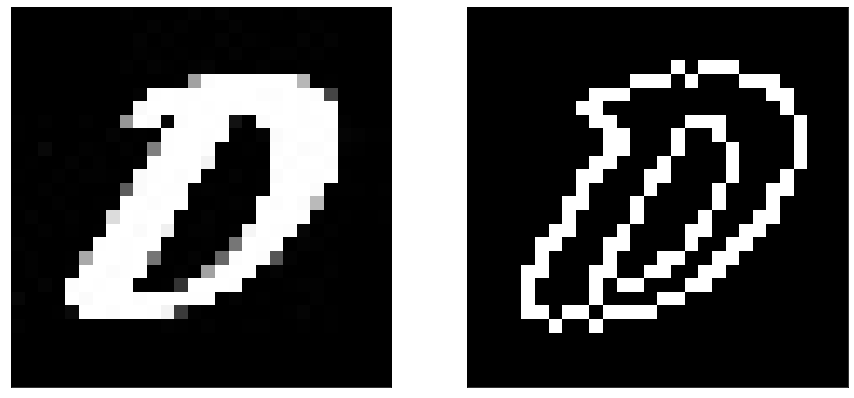

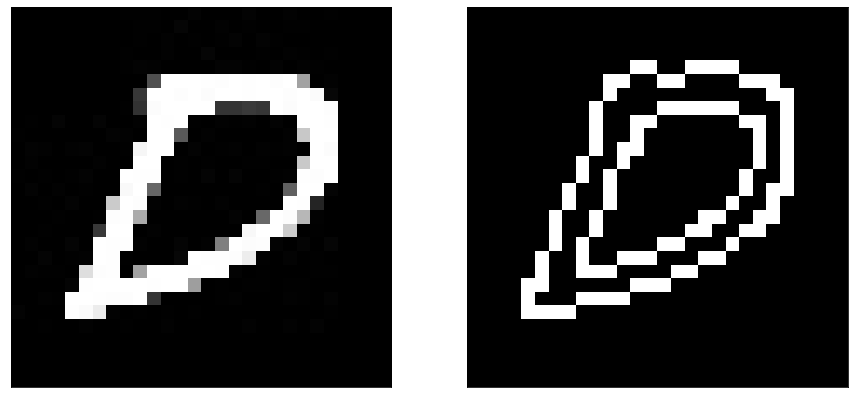

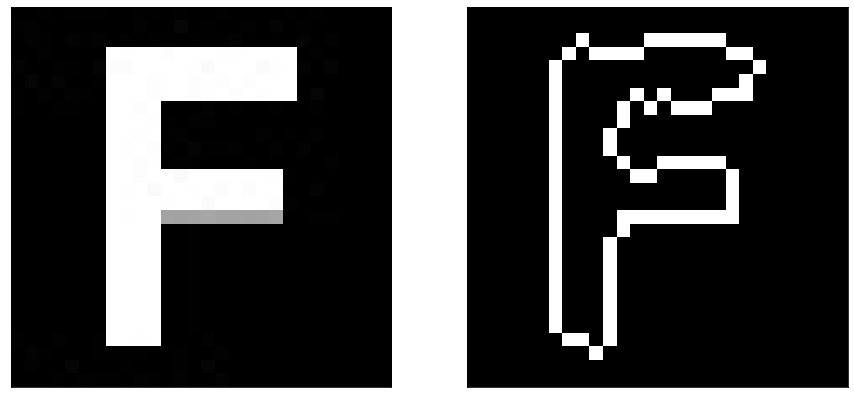

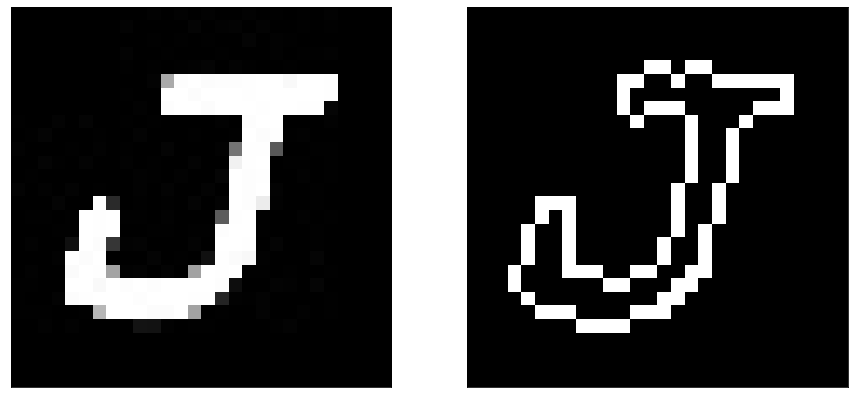

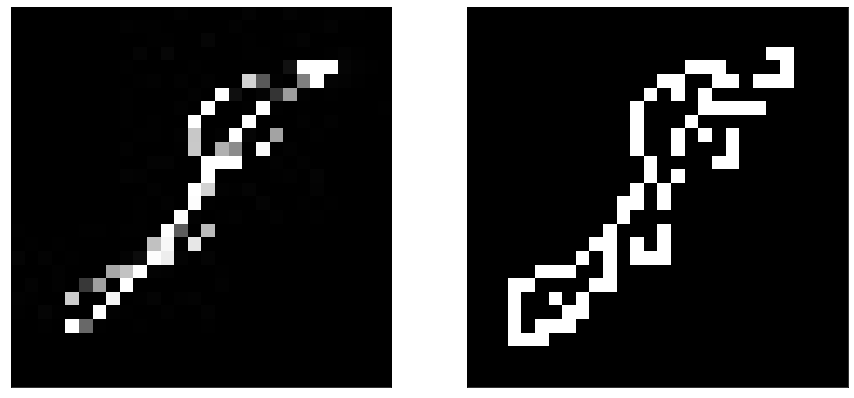

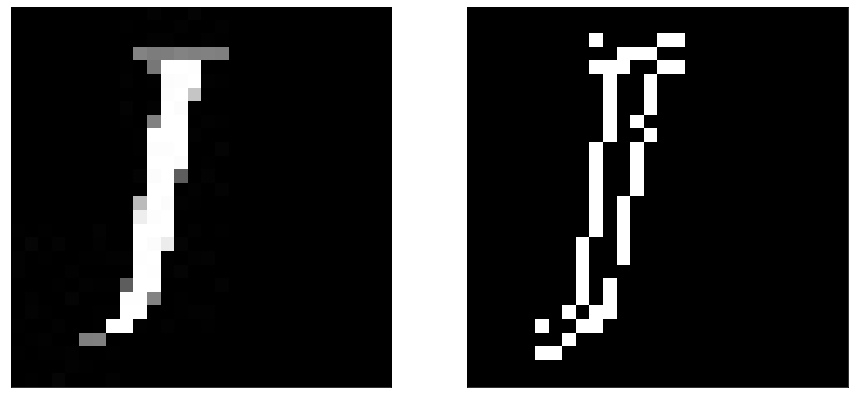

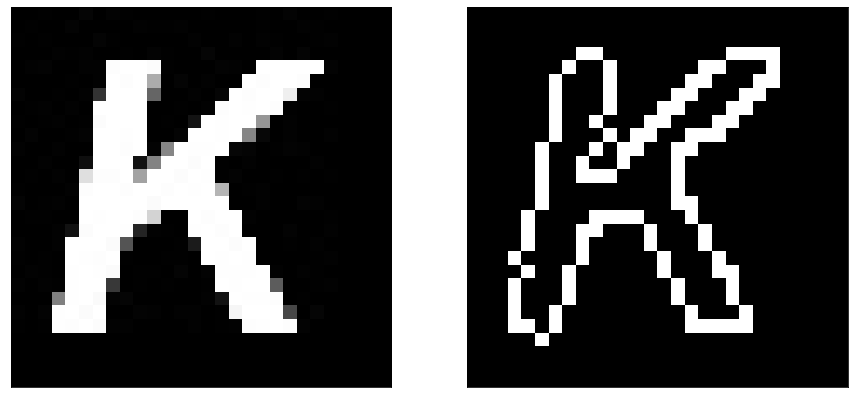

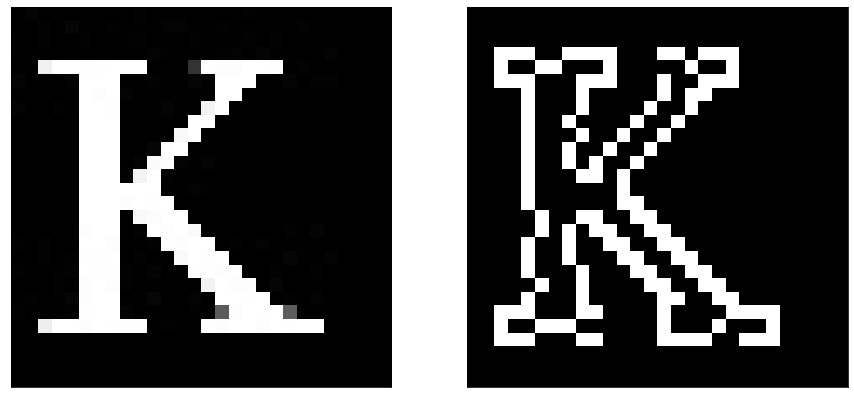

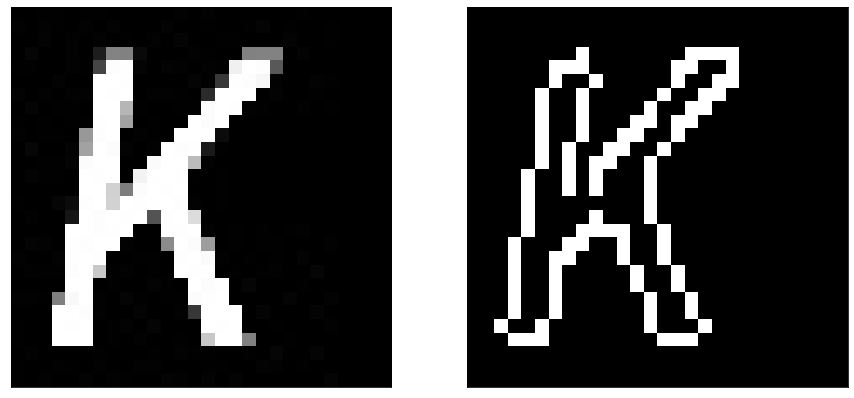

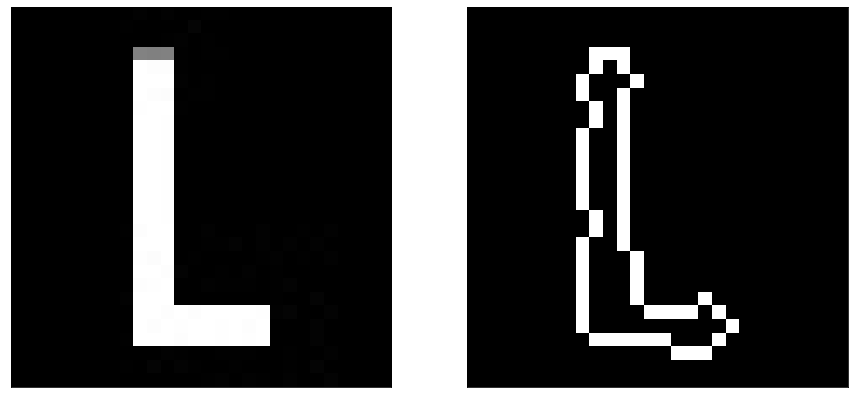

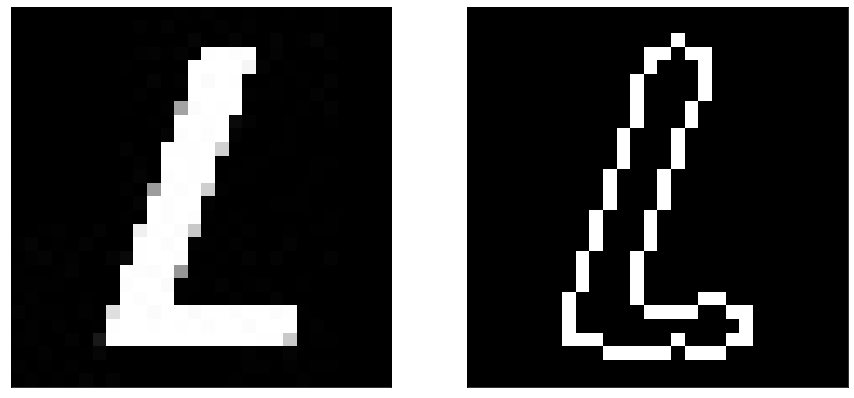

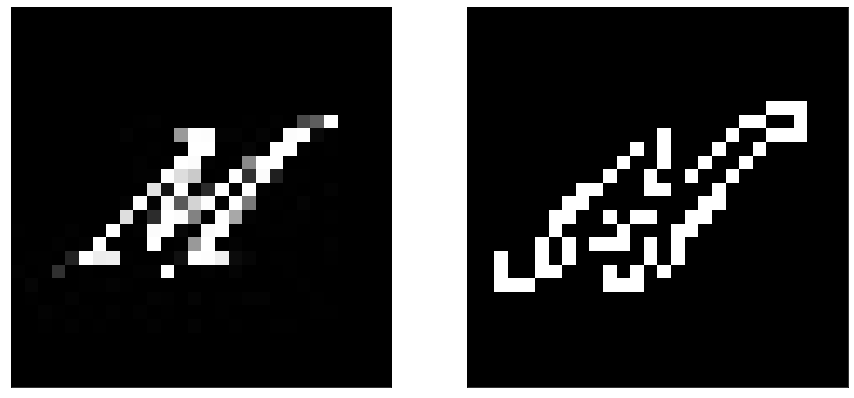

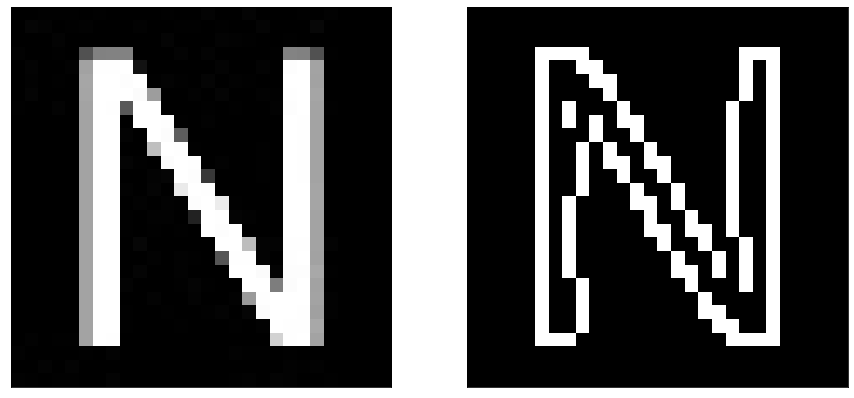

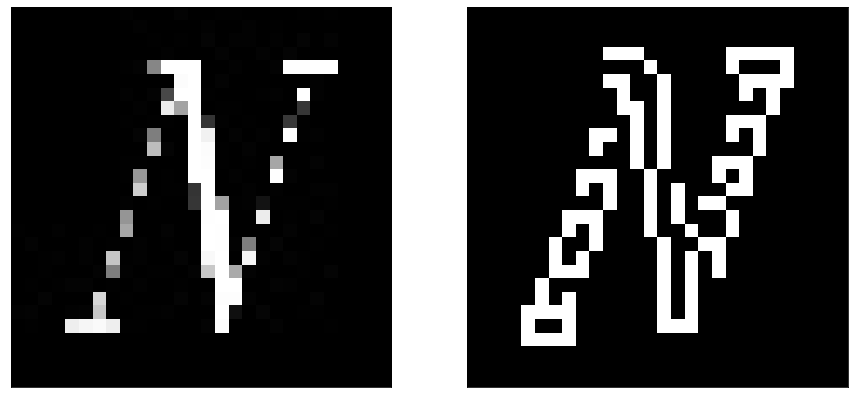

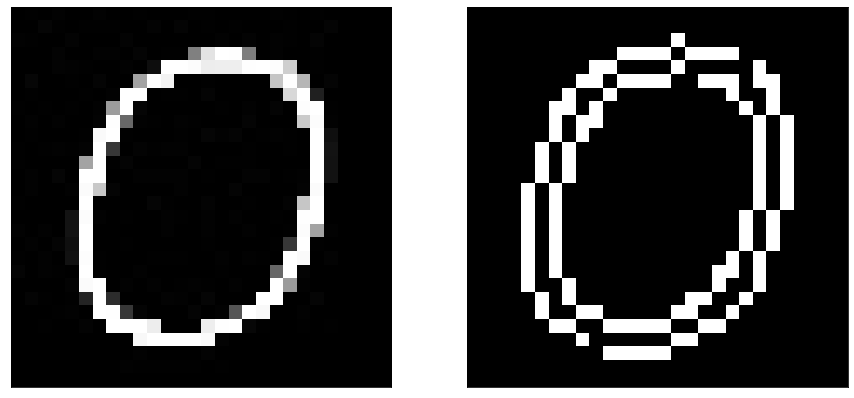

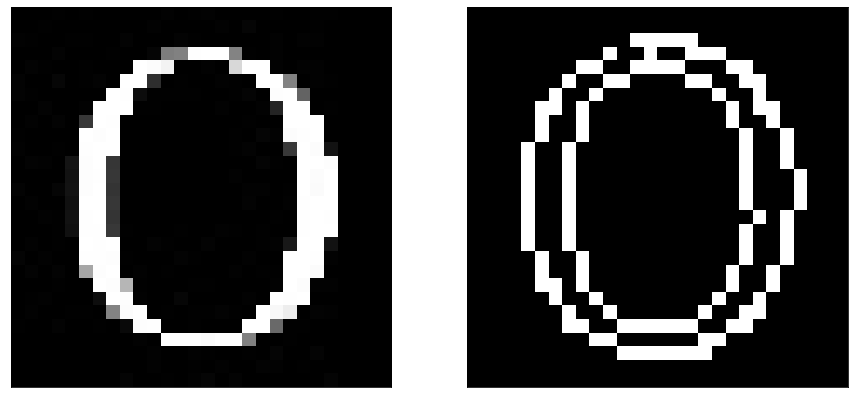

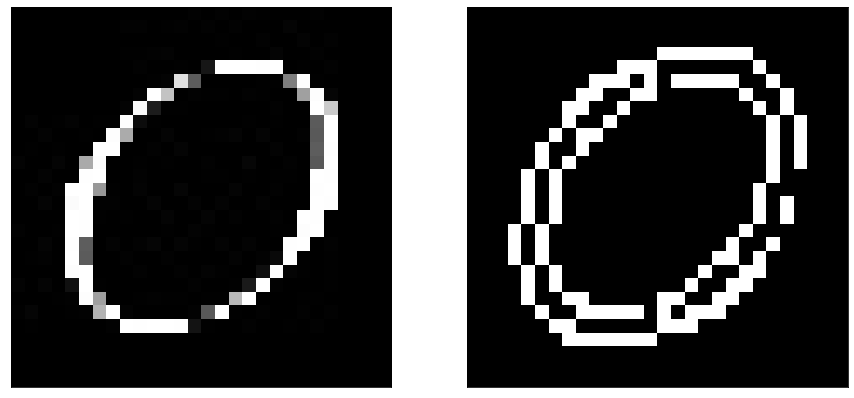

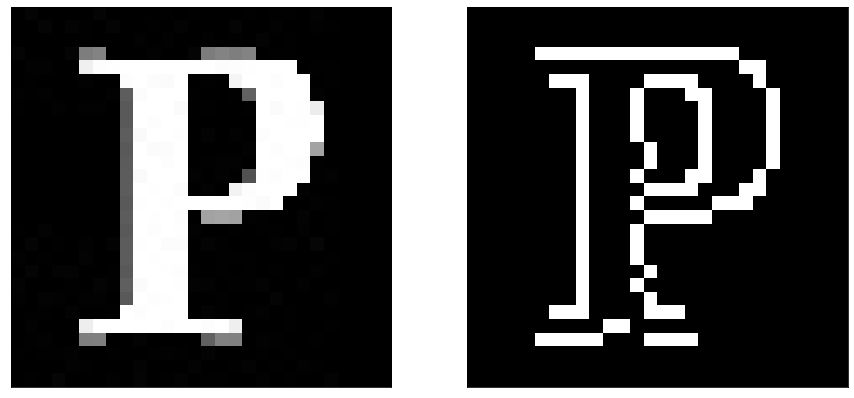

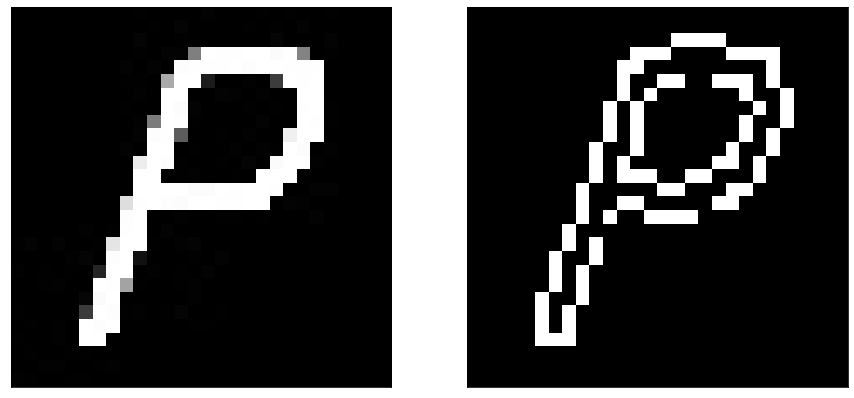

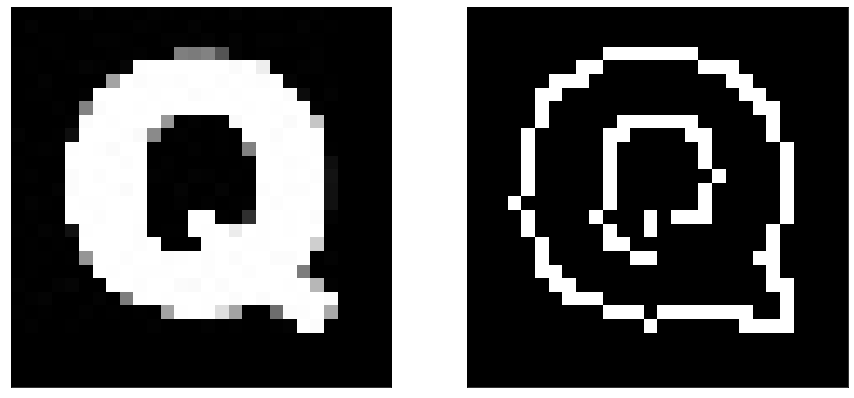

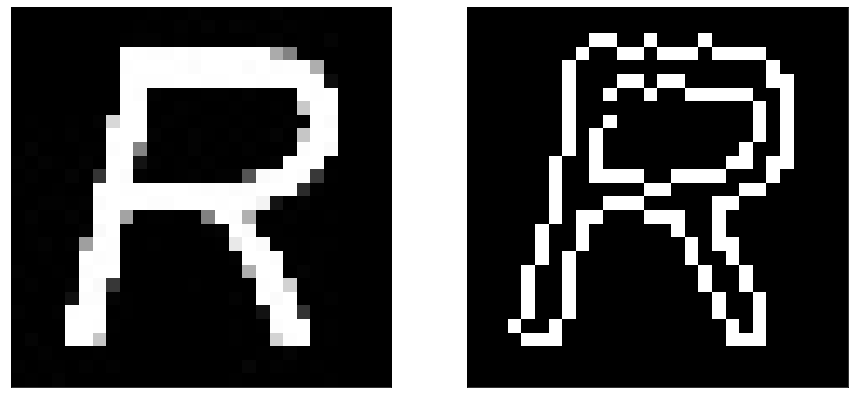

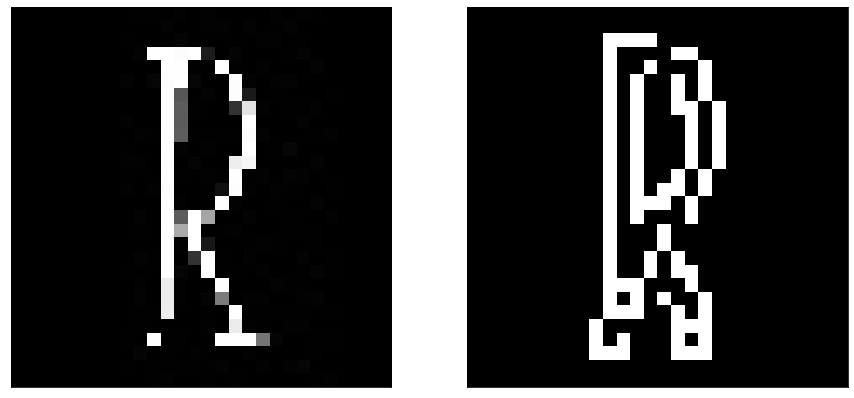

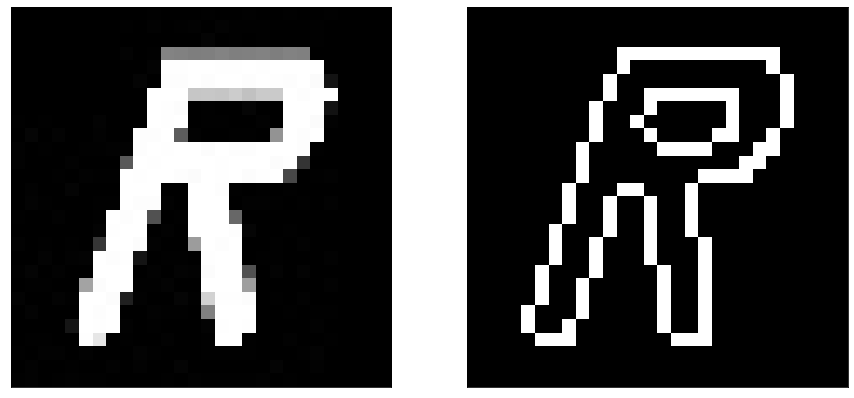

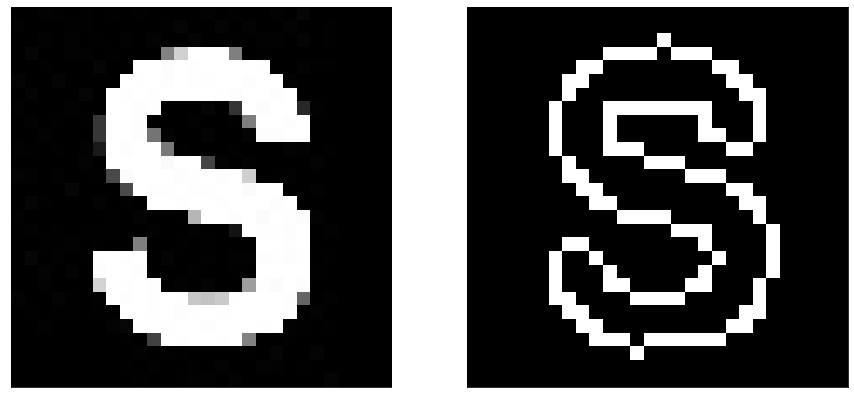

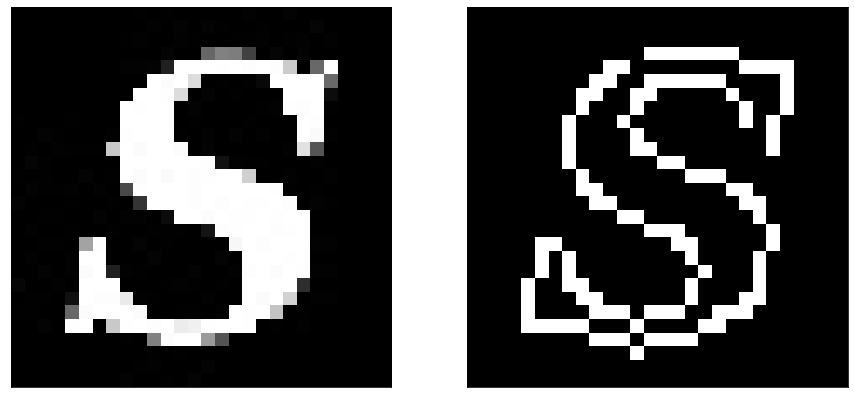

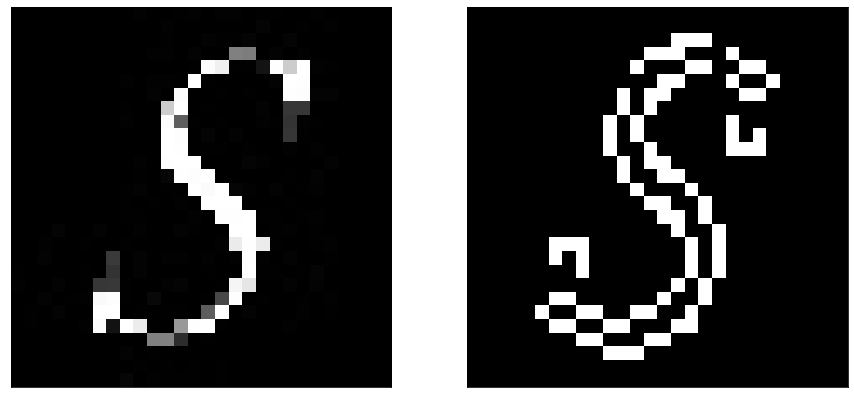

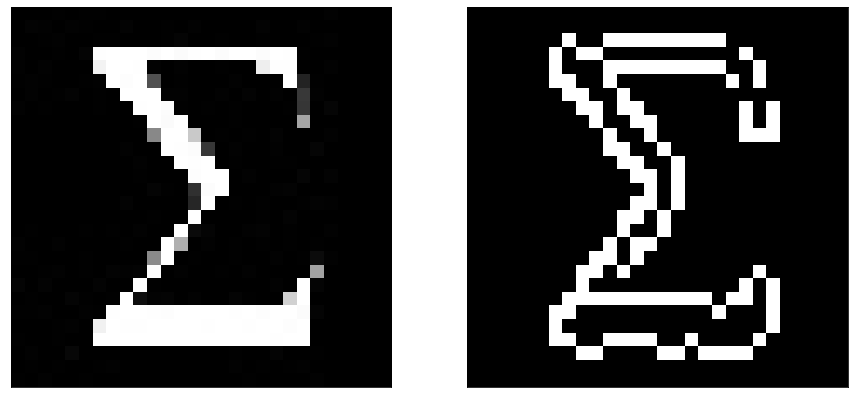

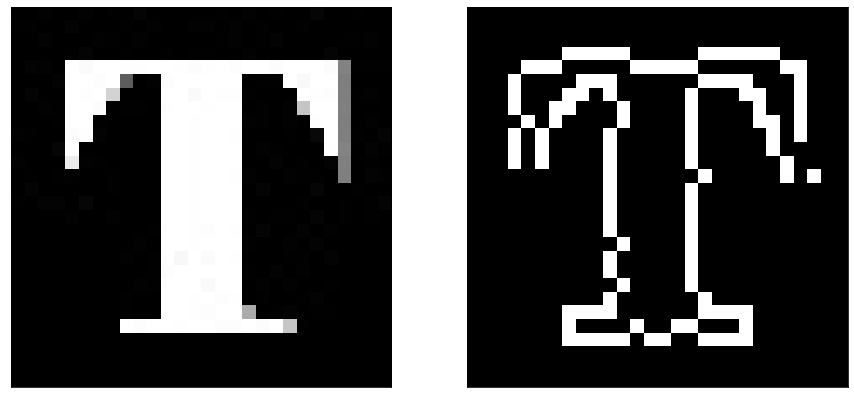

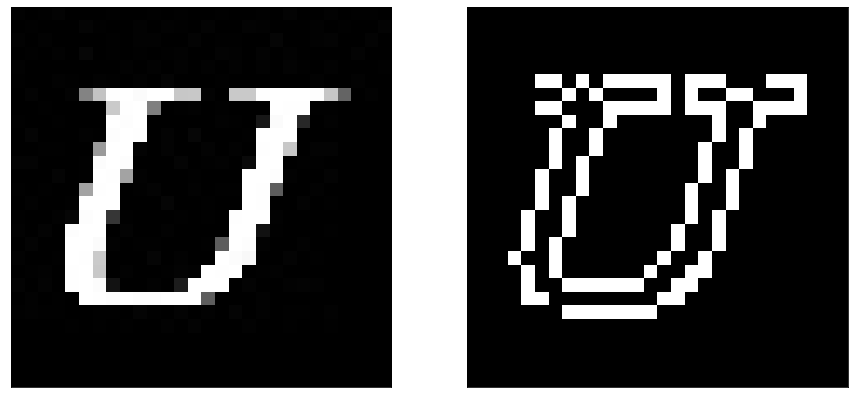

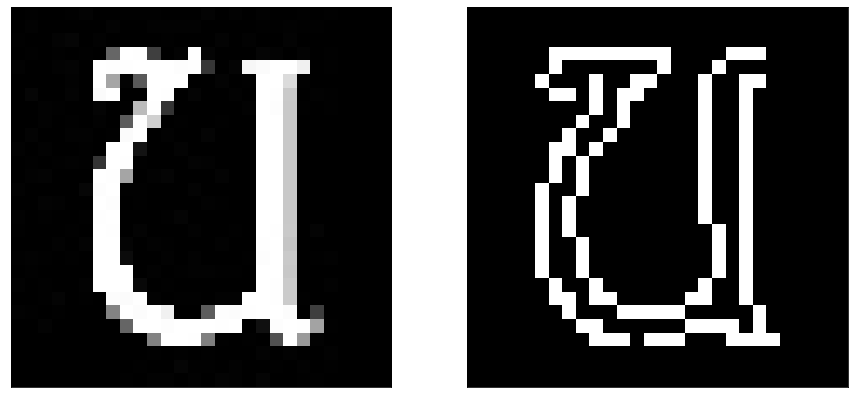

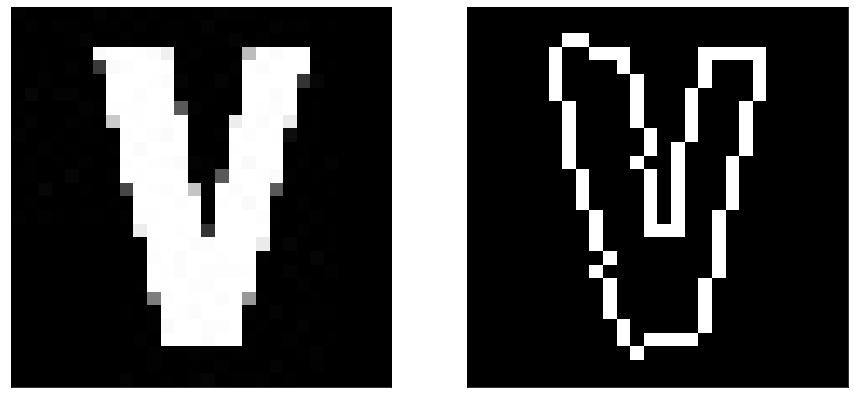

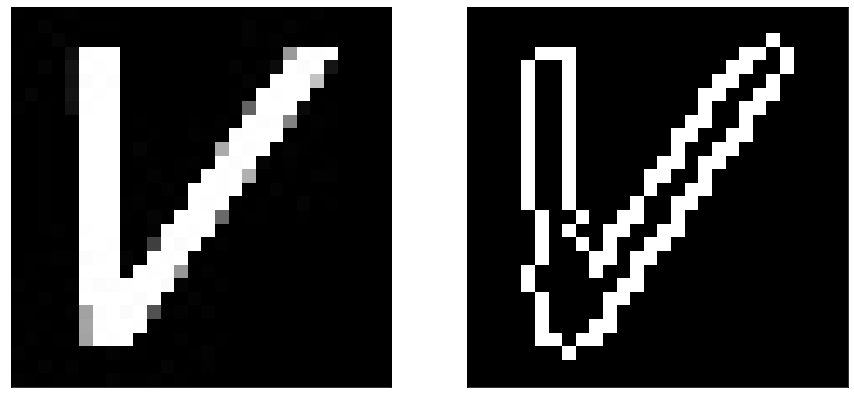

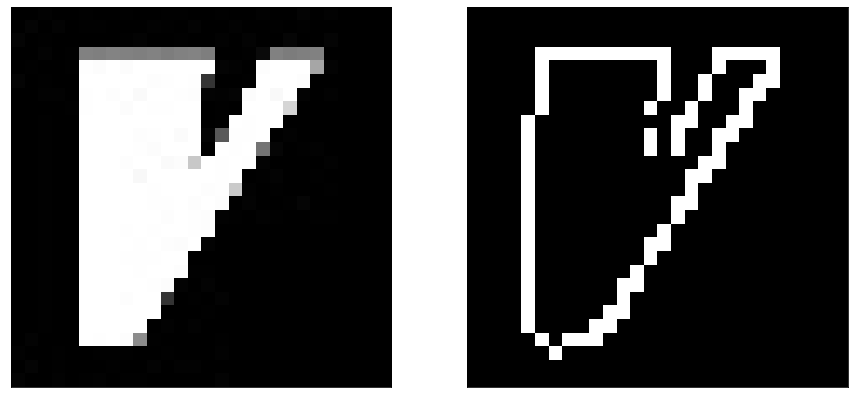

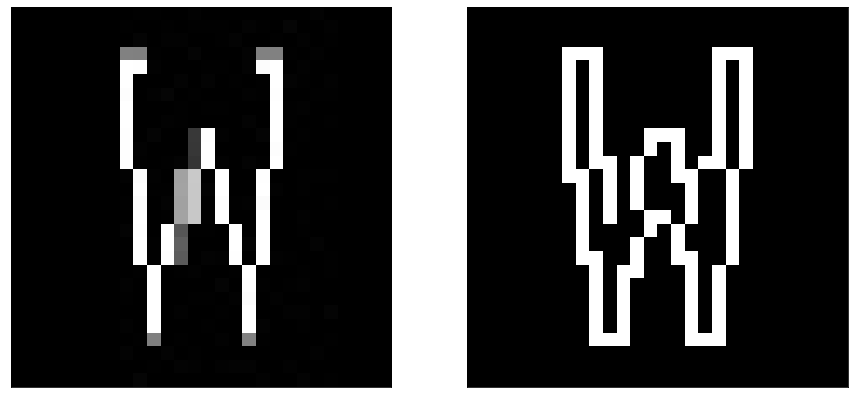

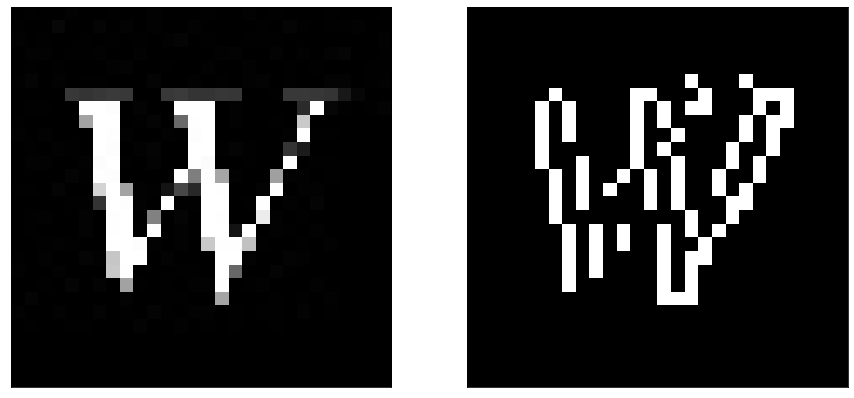

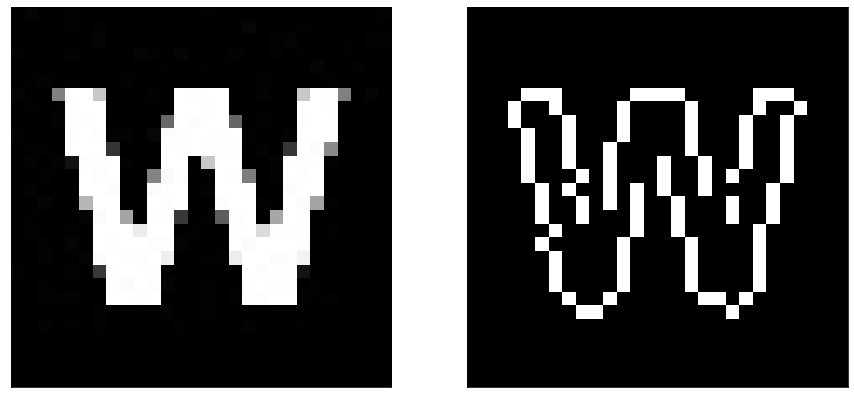

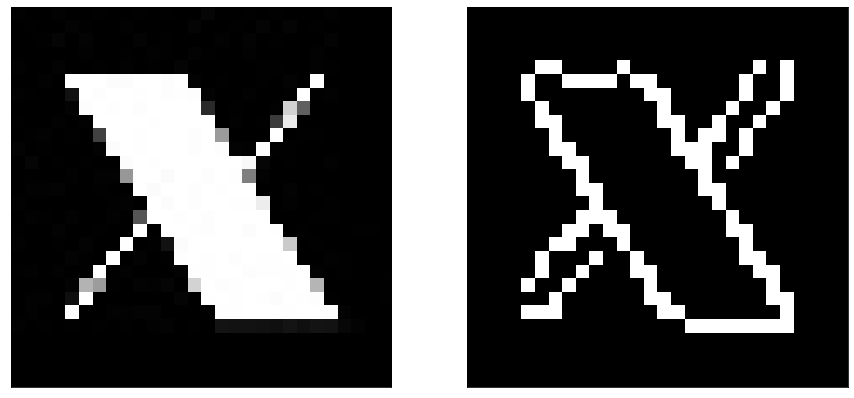

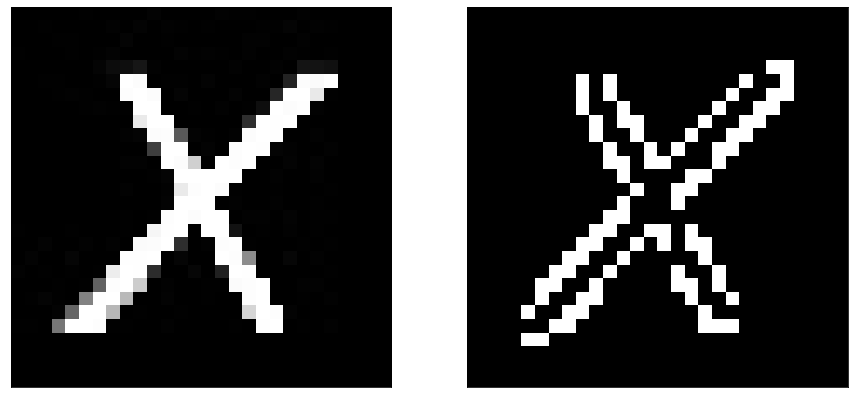

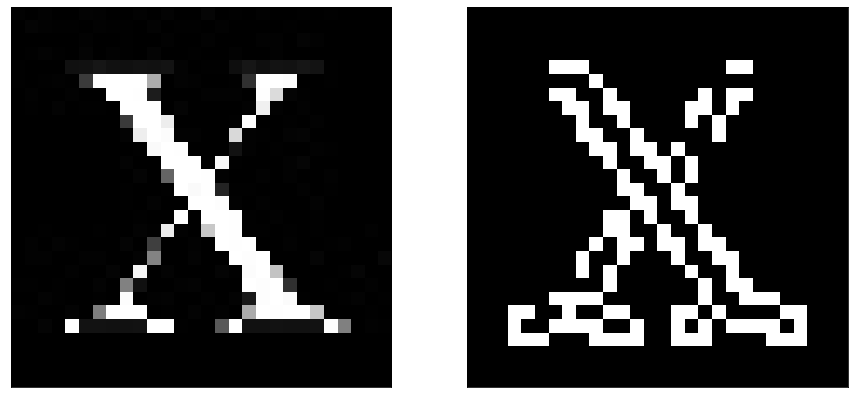

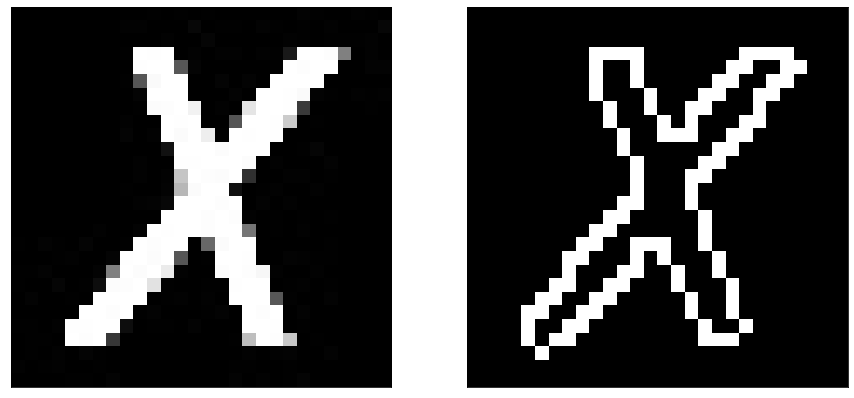

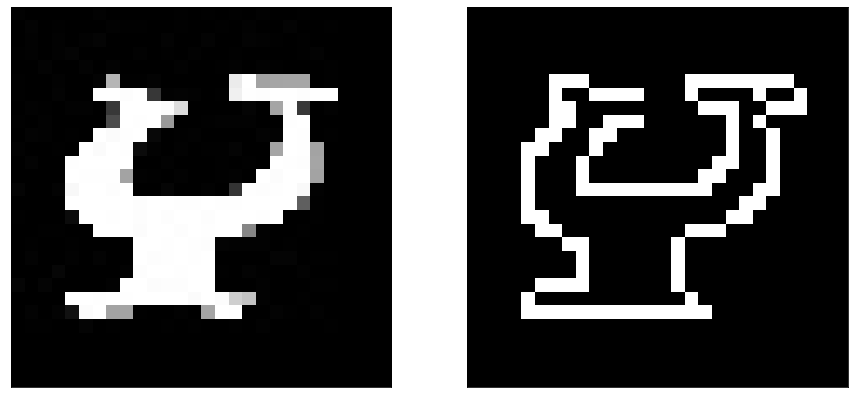

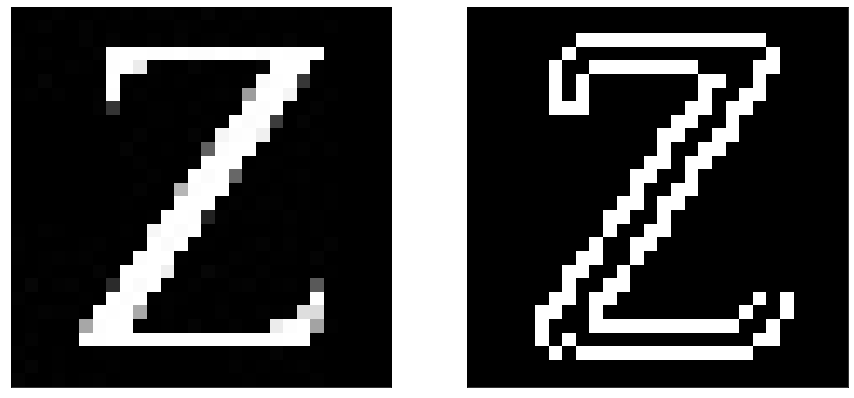

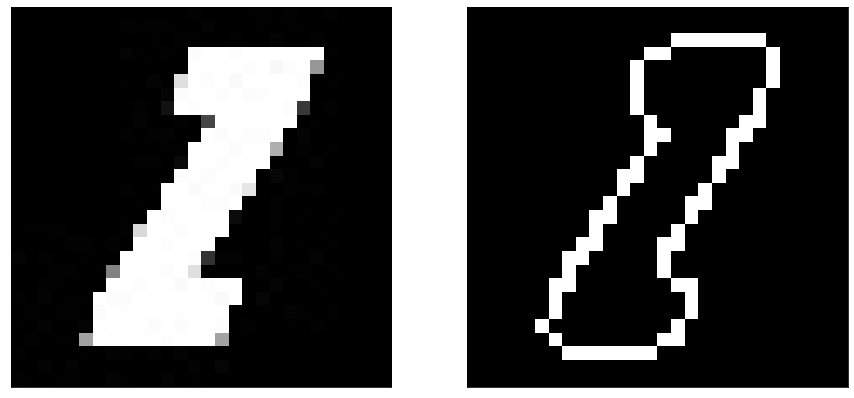

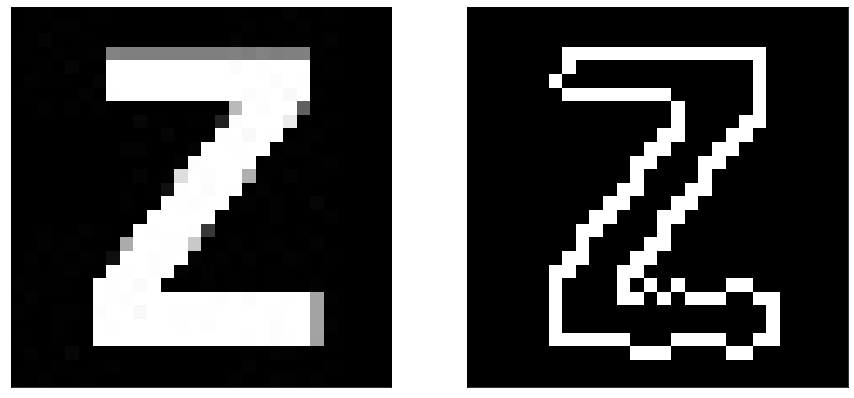

In [259]:
for i in range(0,36575,300):    
    edges = cv2.Canny(data[i], 30, 200)
    plot_images(data[i], edges)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


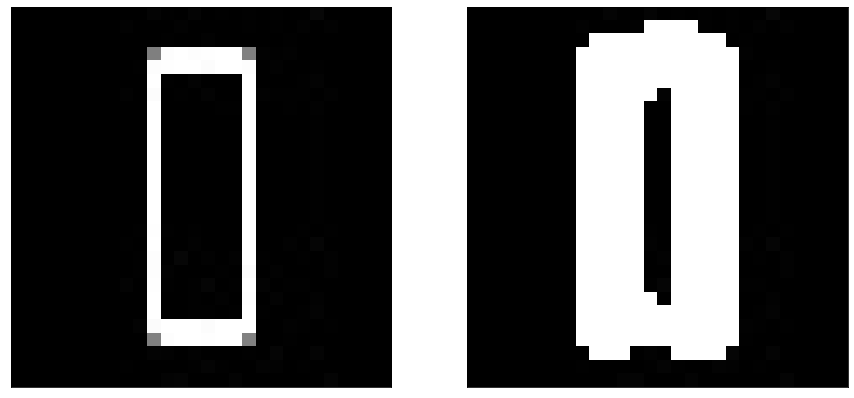

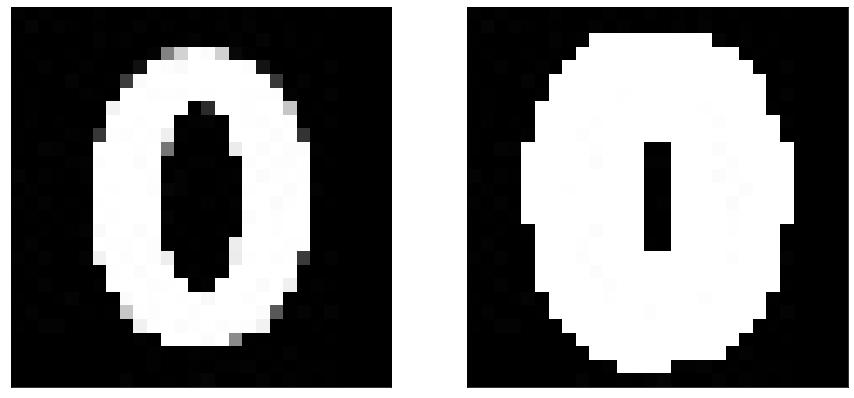

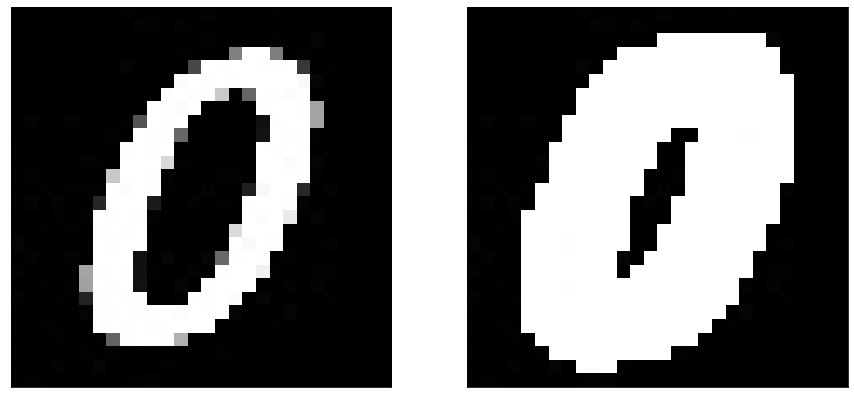

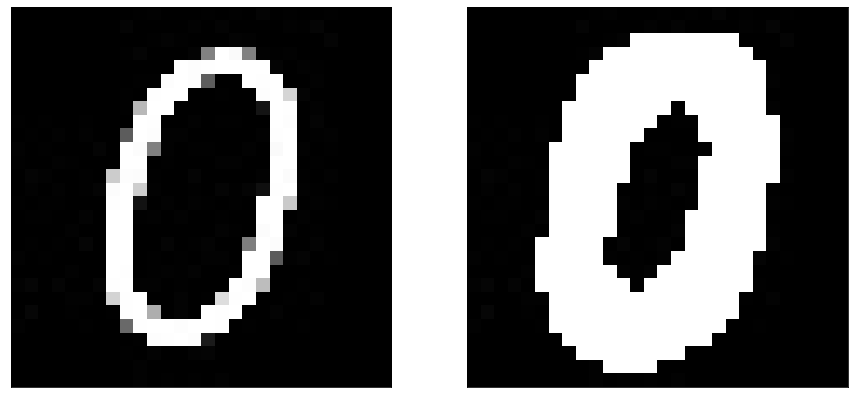

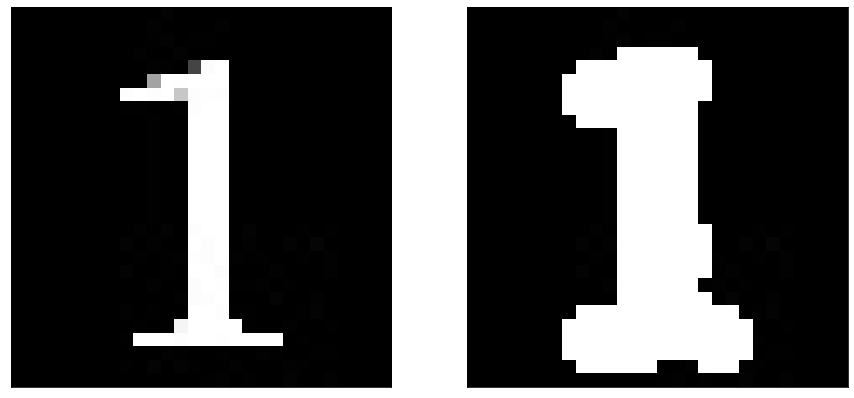

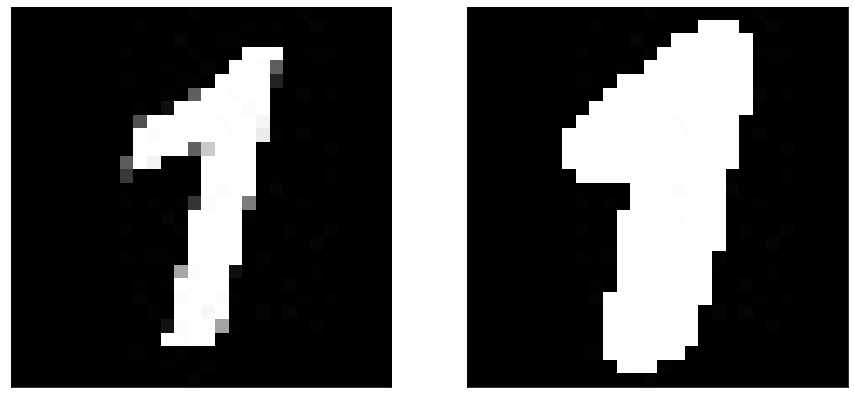

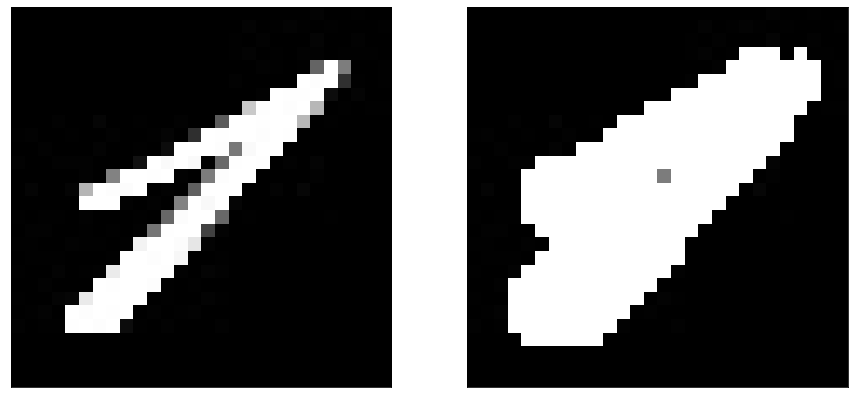

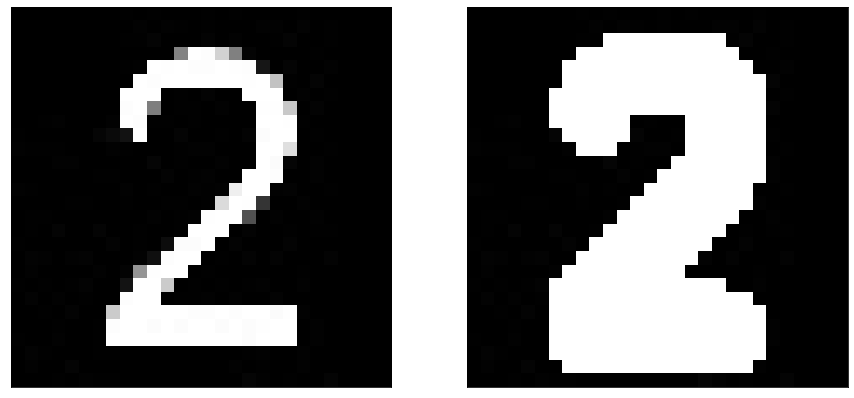

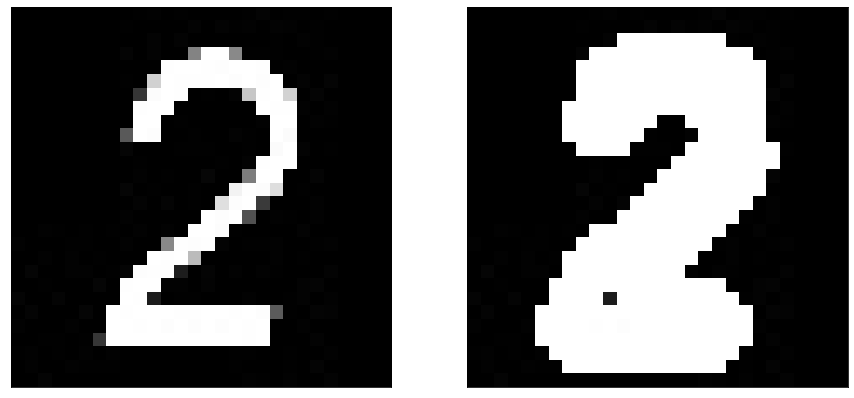

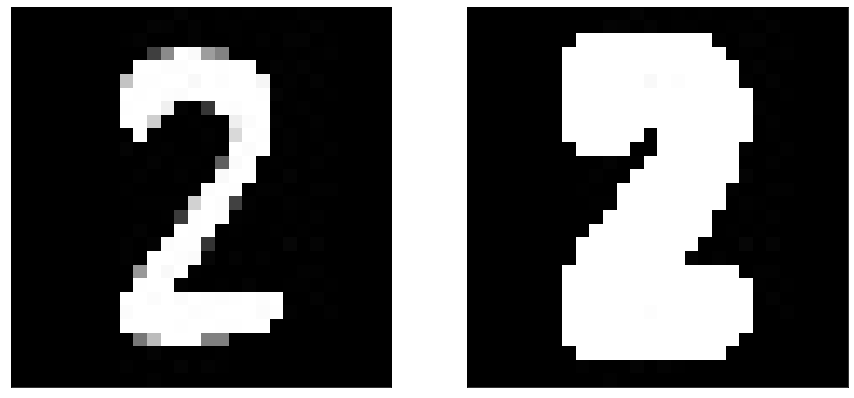

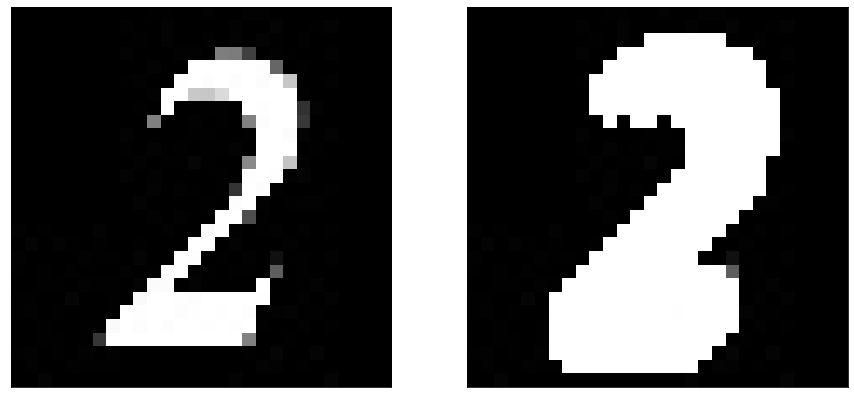

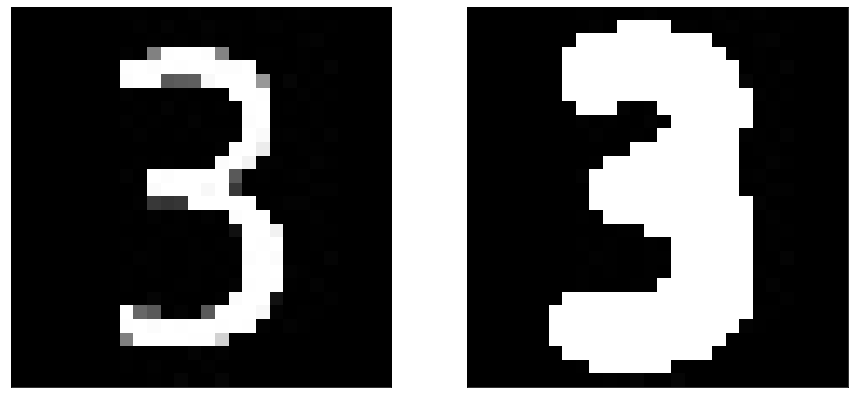

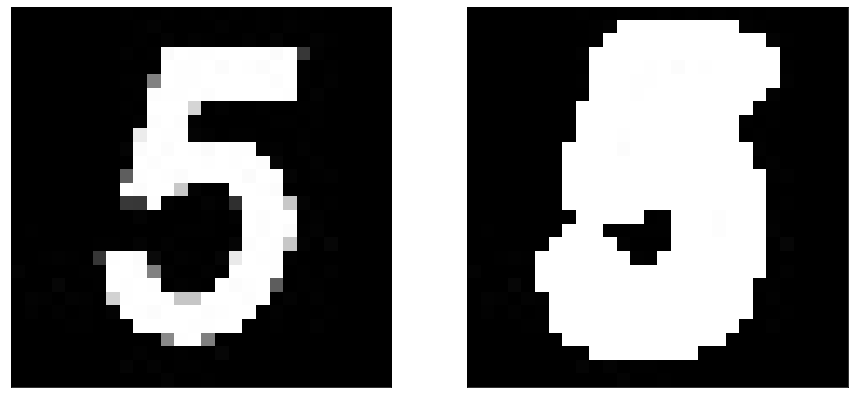

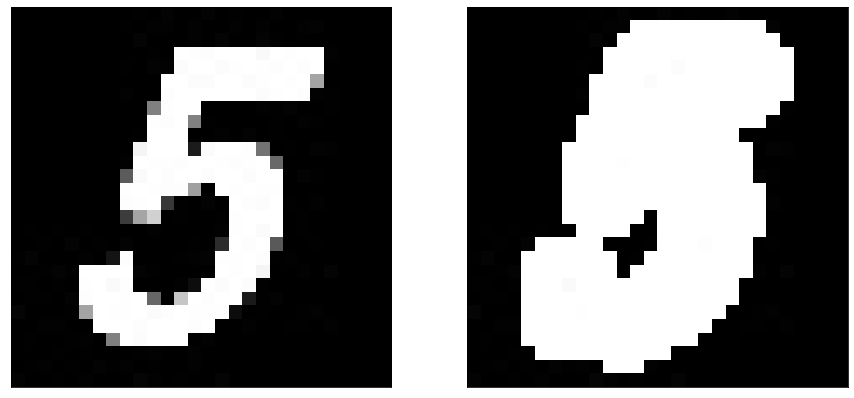

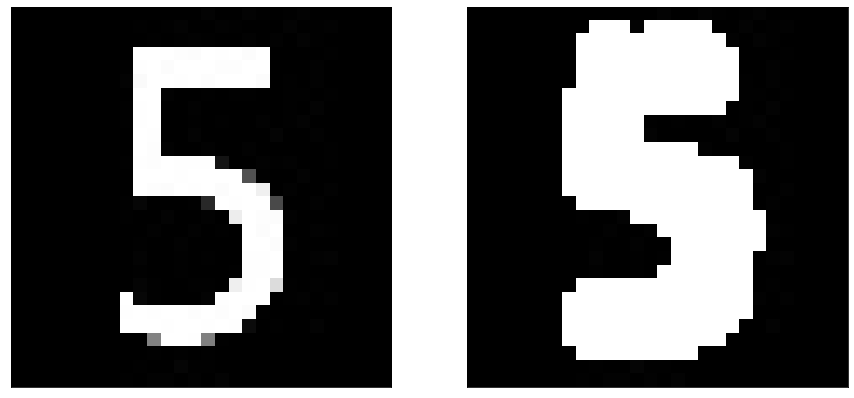

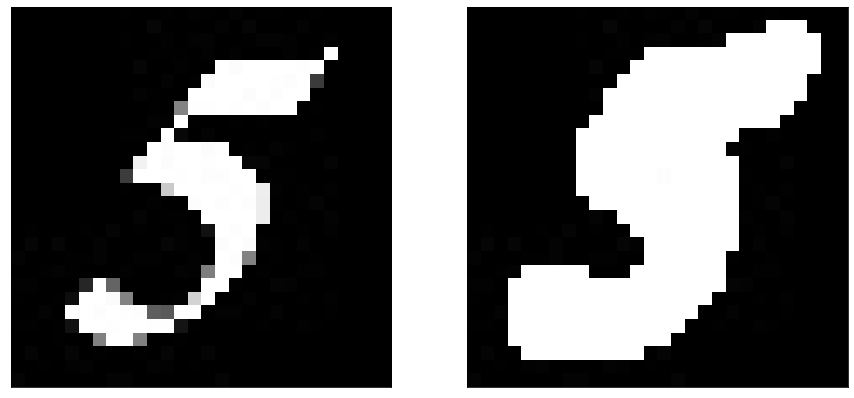

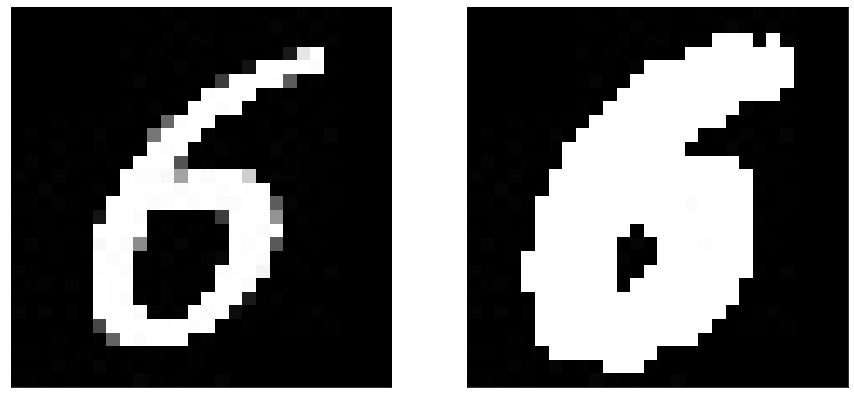

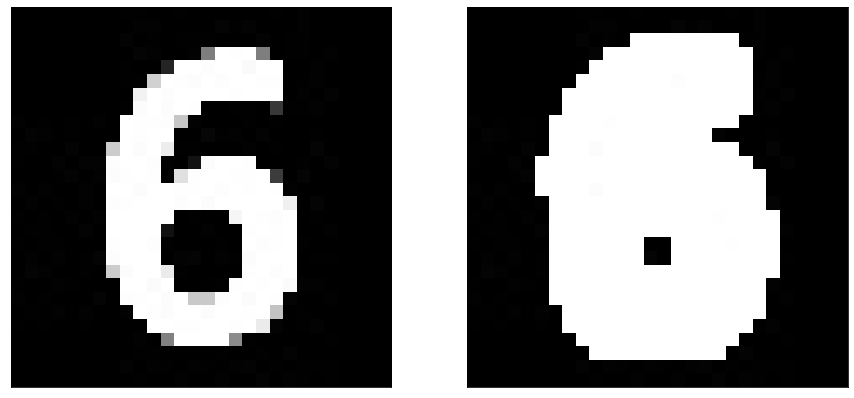

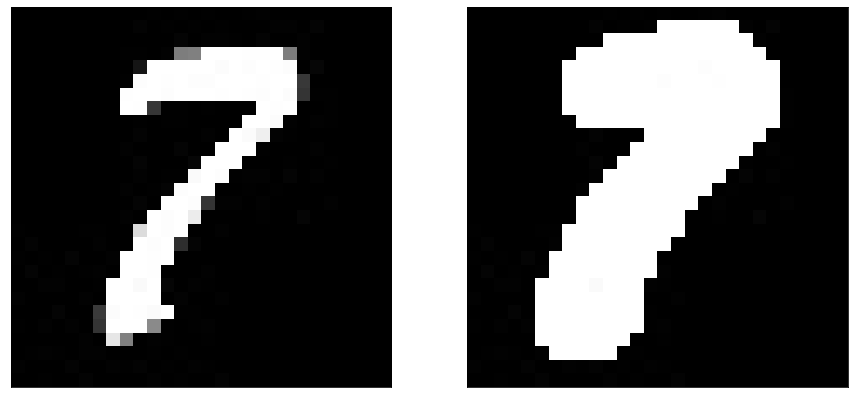

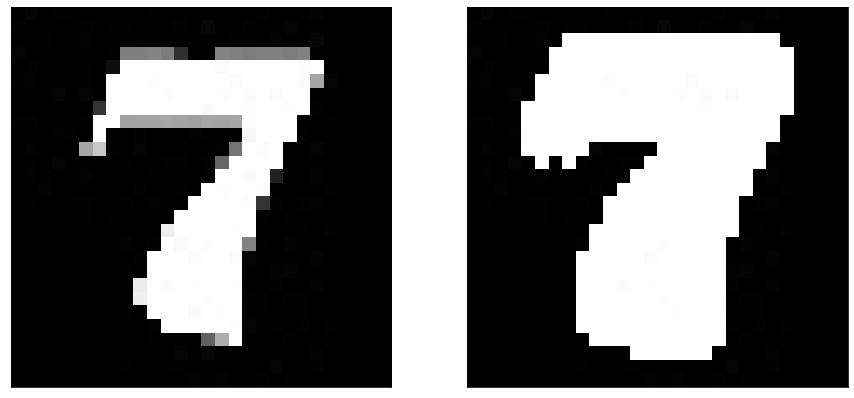

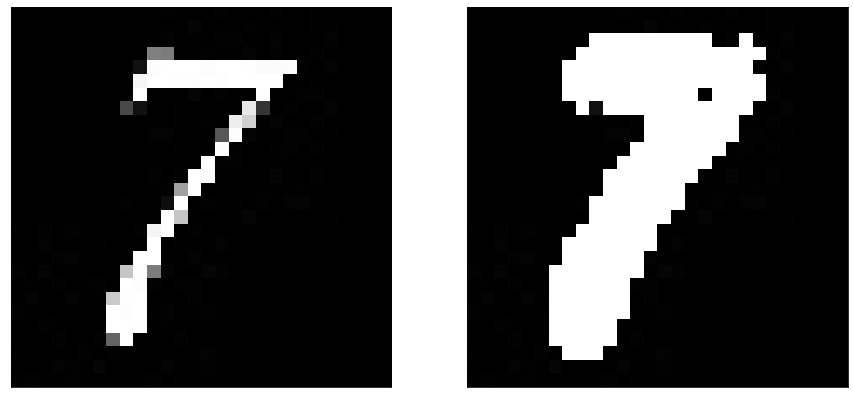

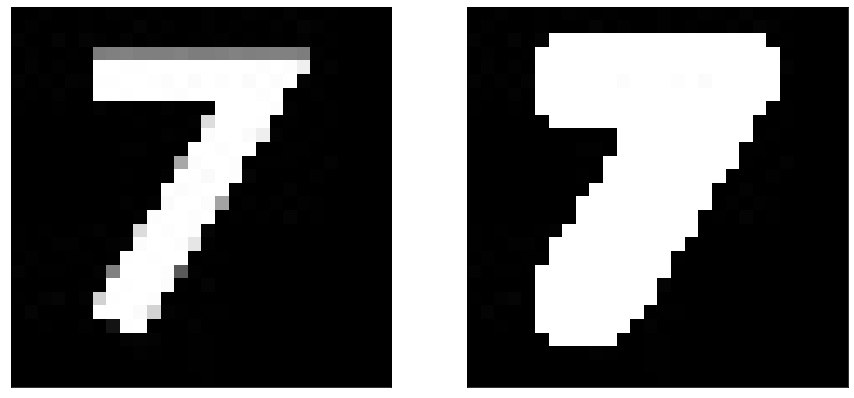

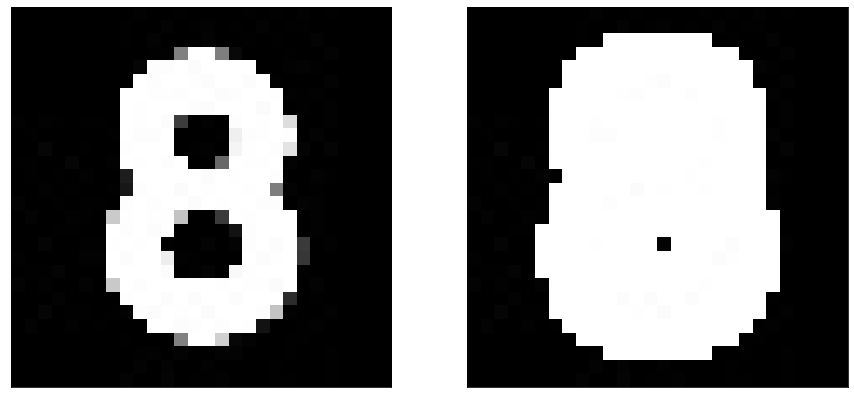

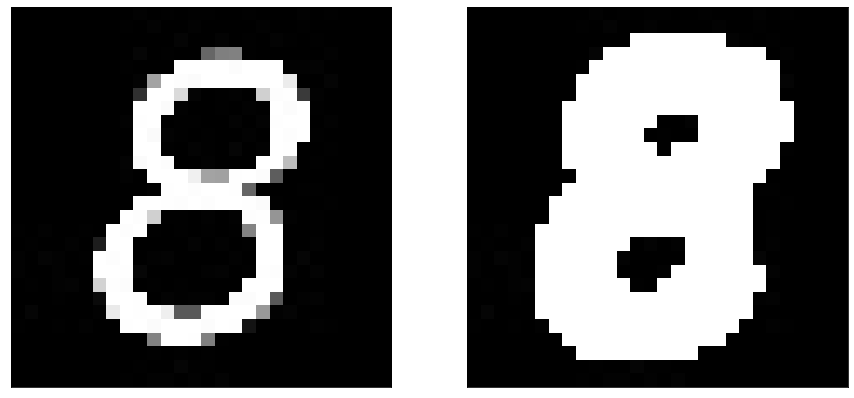

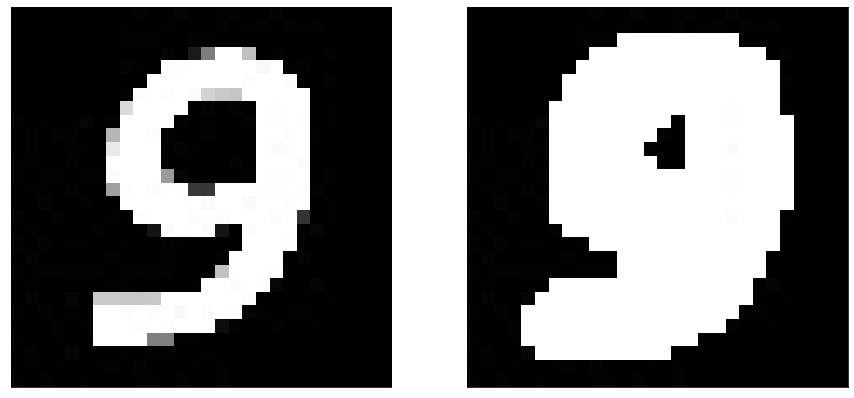

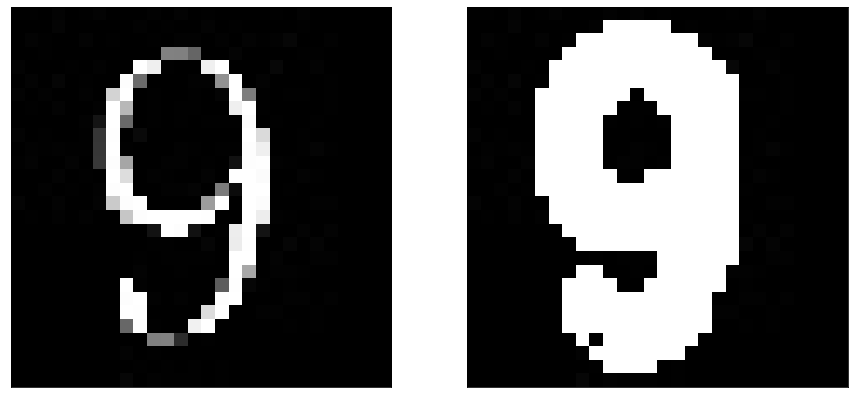

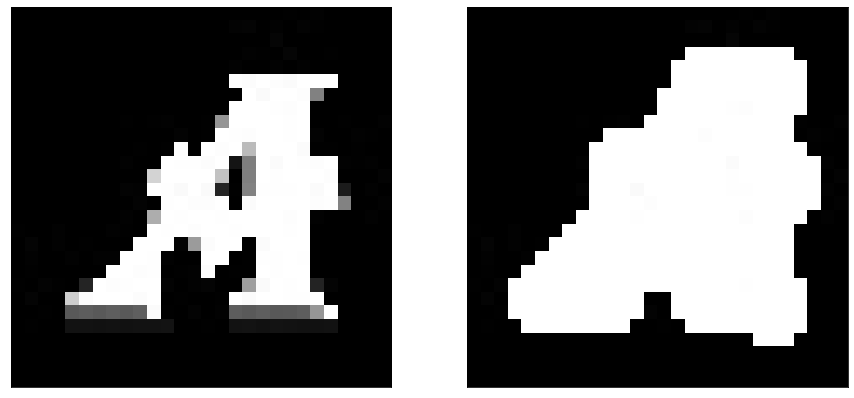

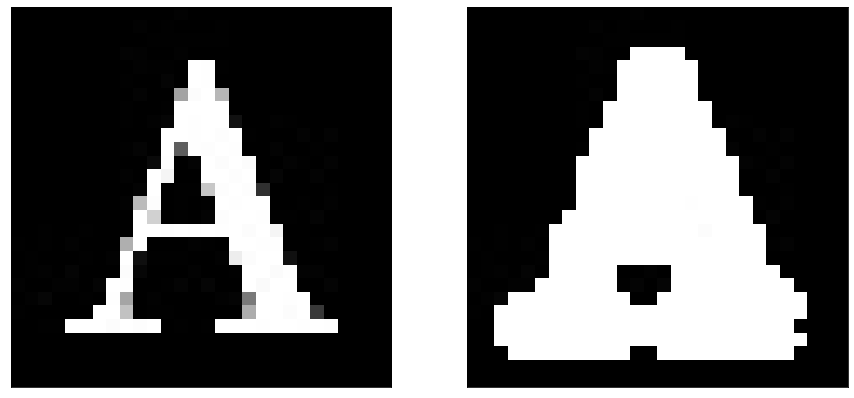

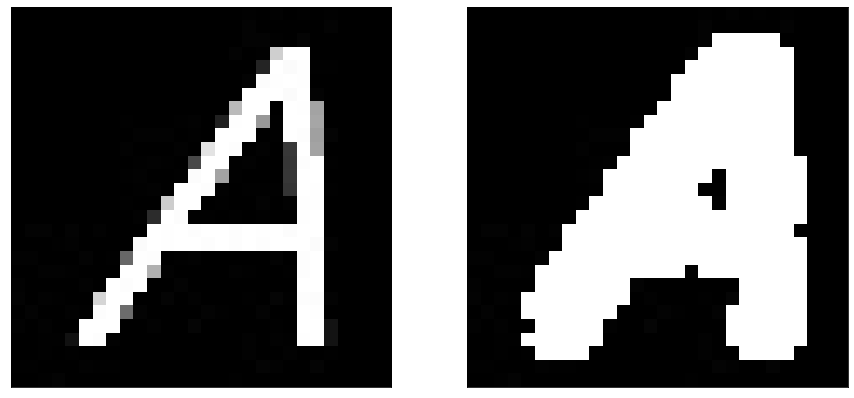

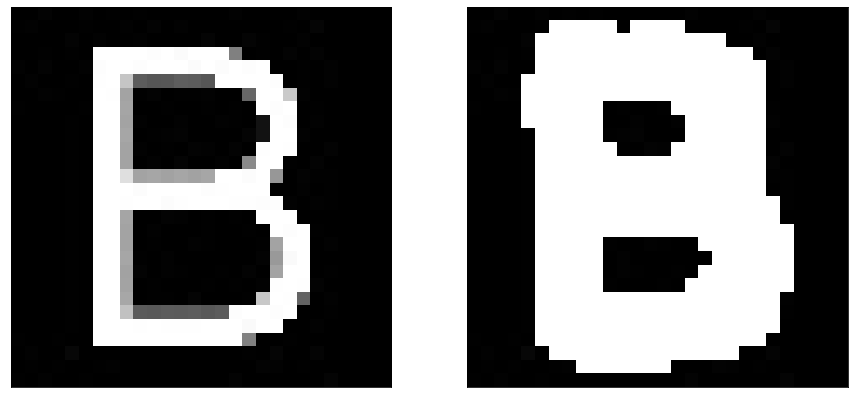

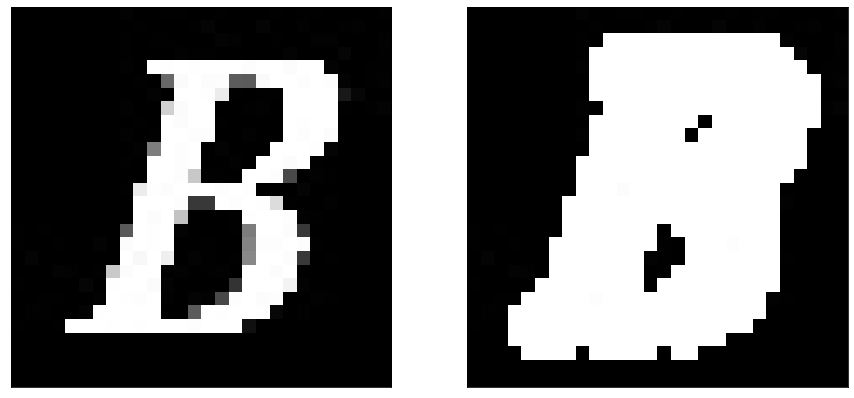

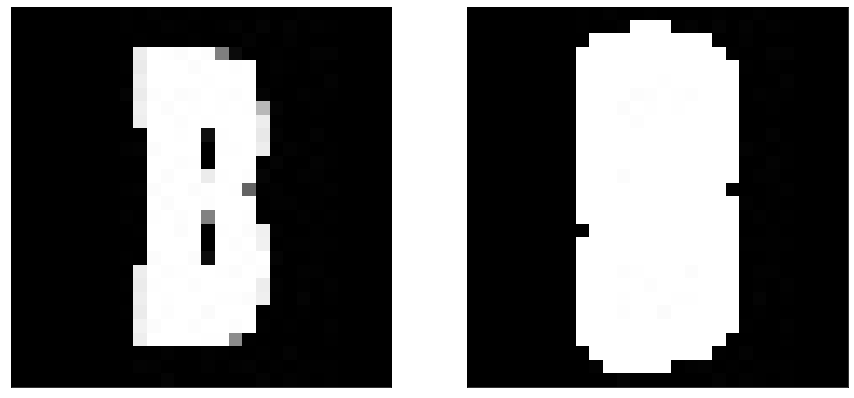

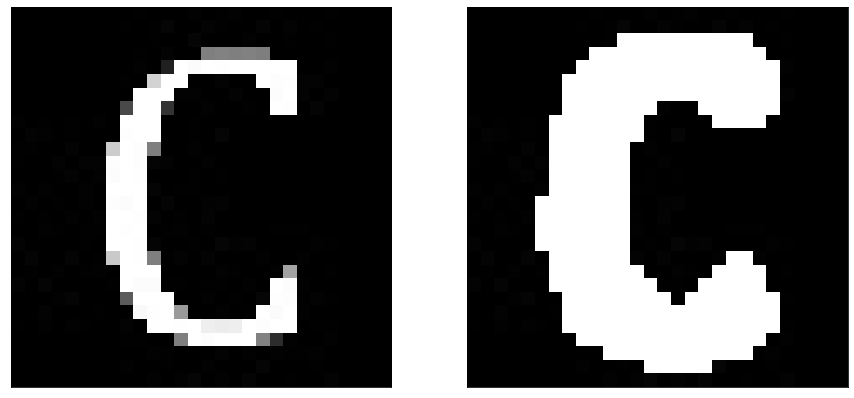

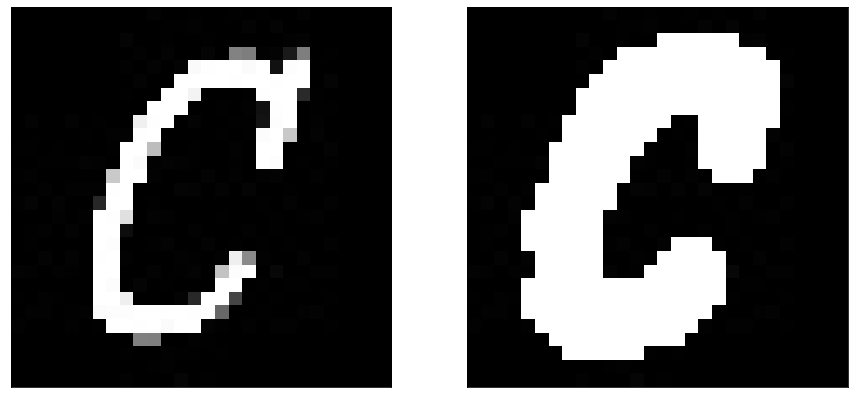

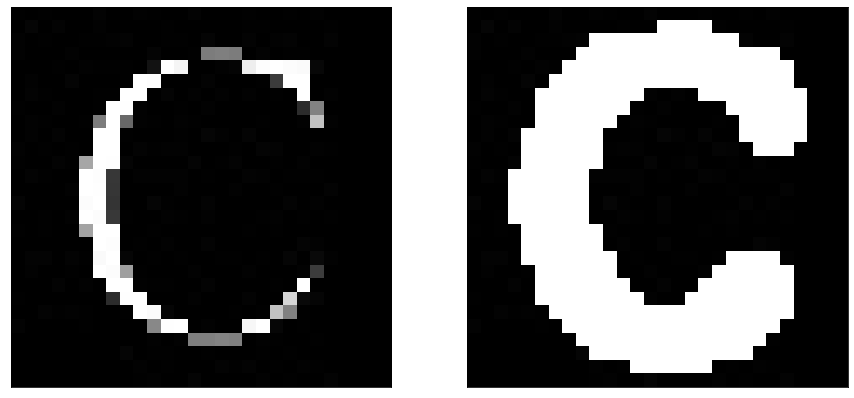

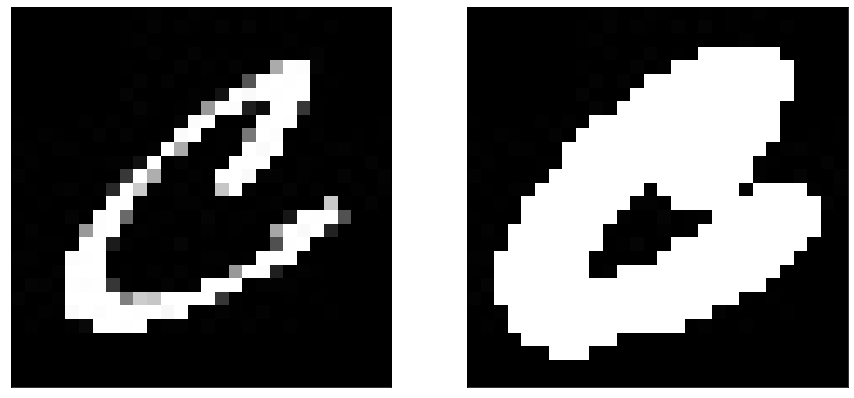

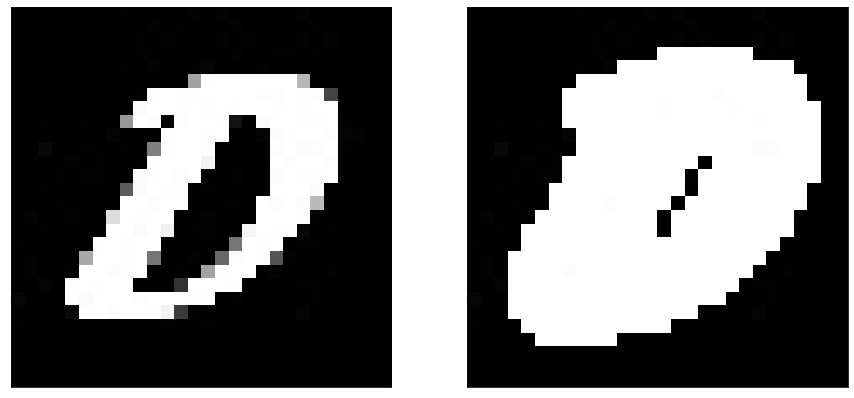

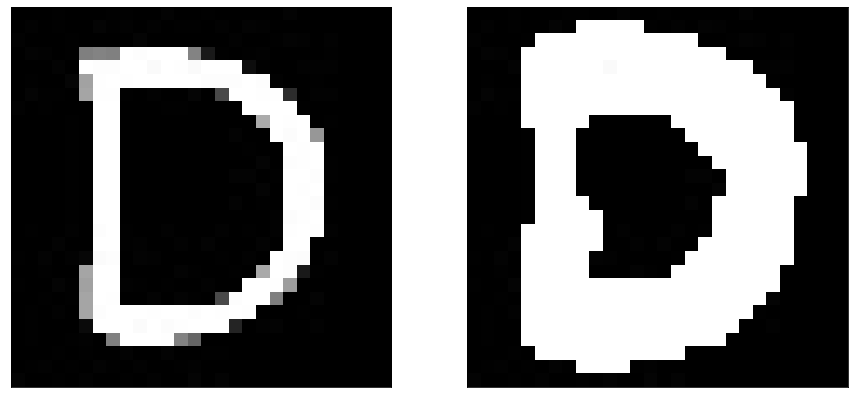

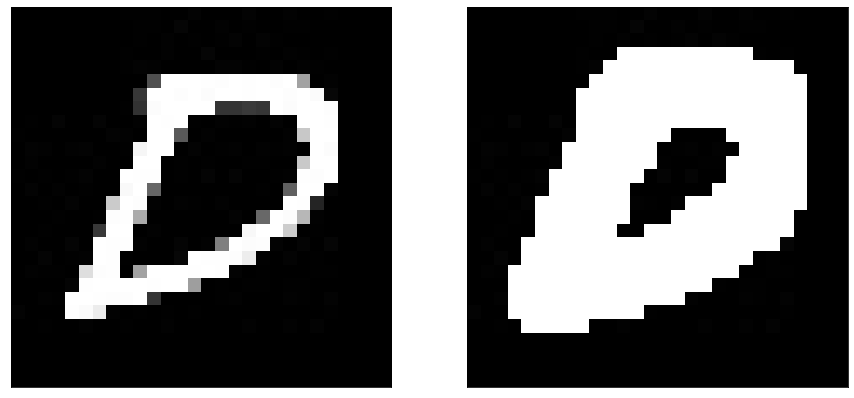

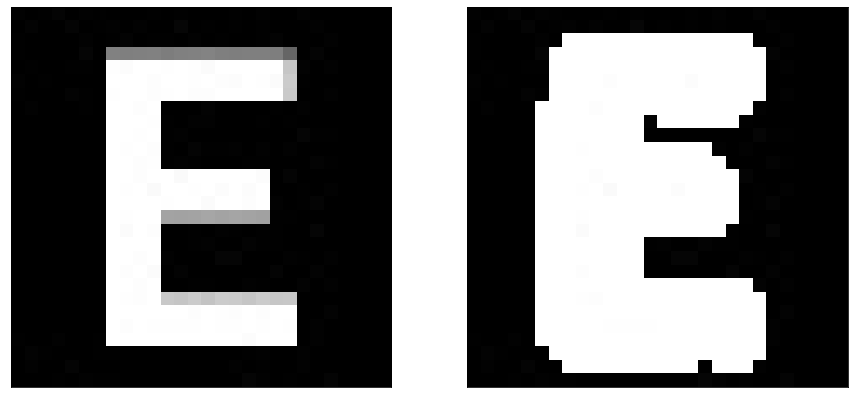

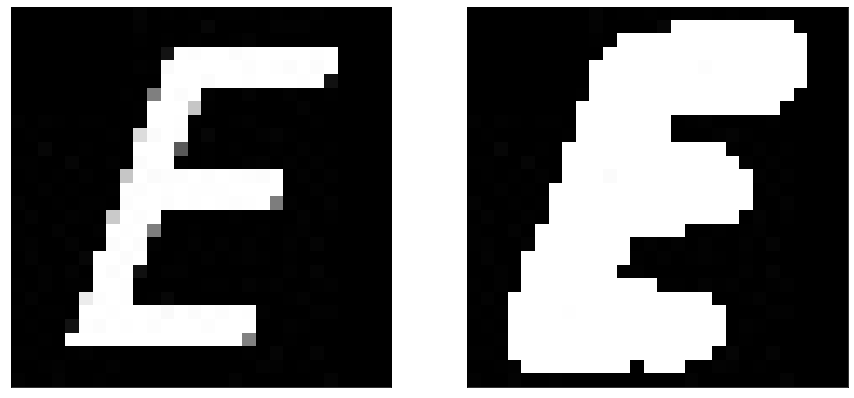

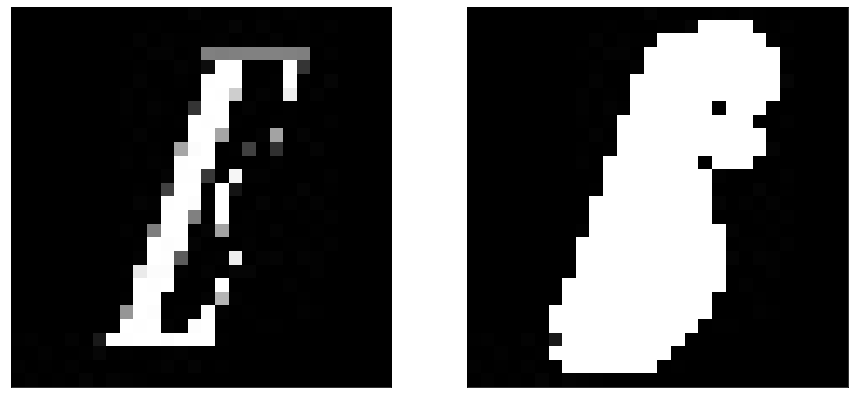

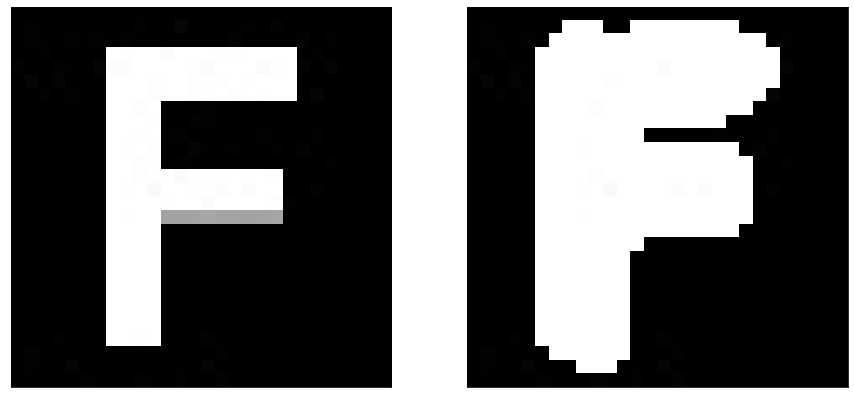

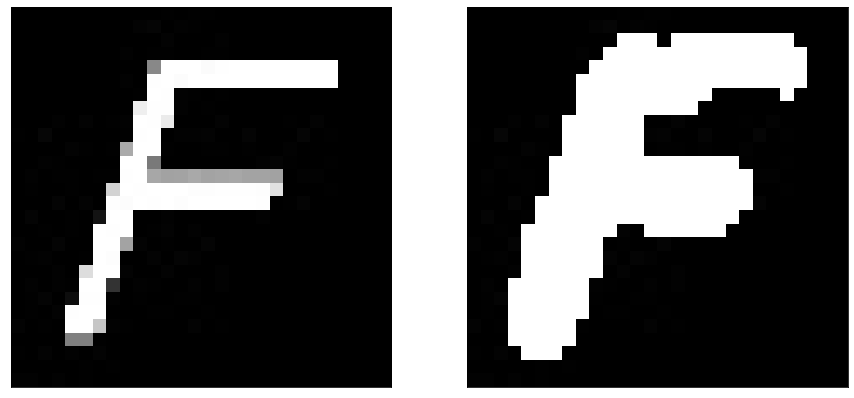

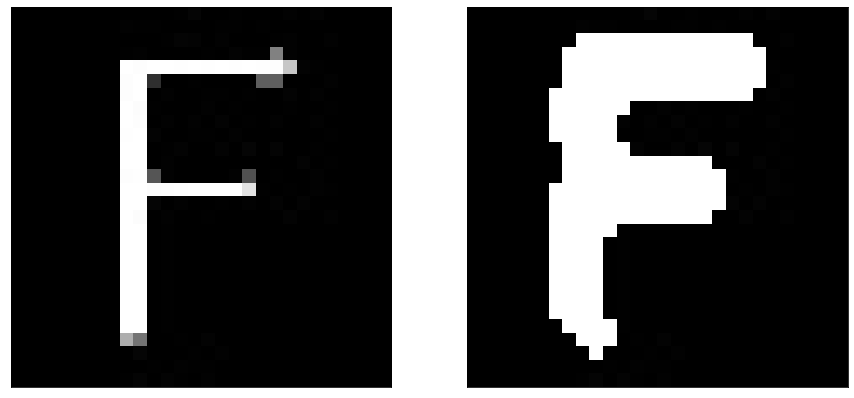

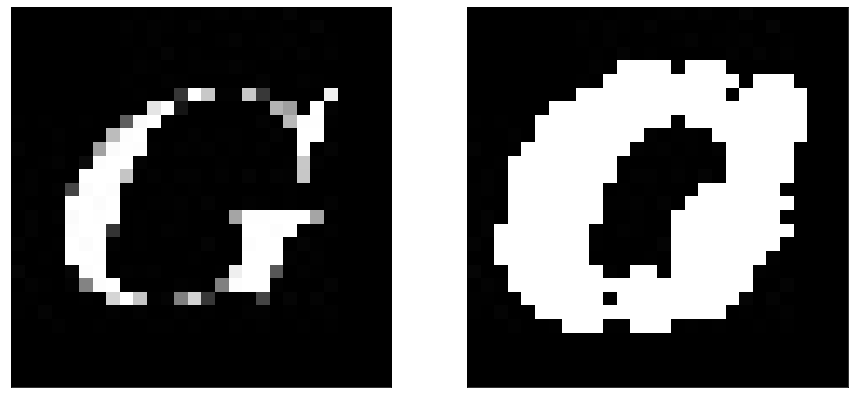

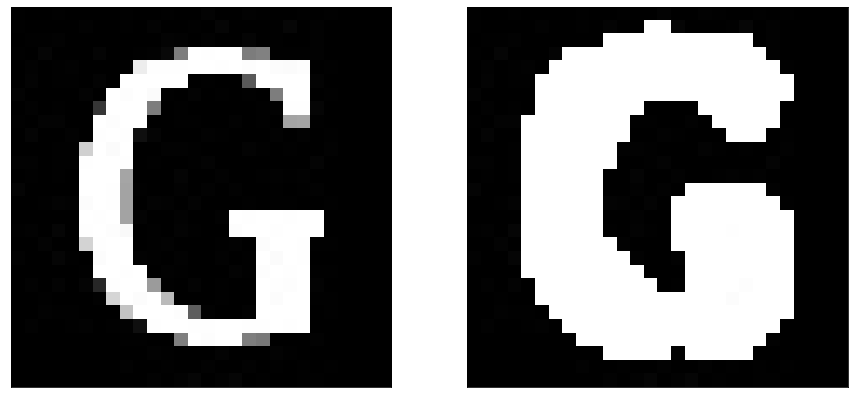

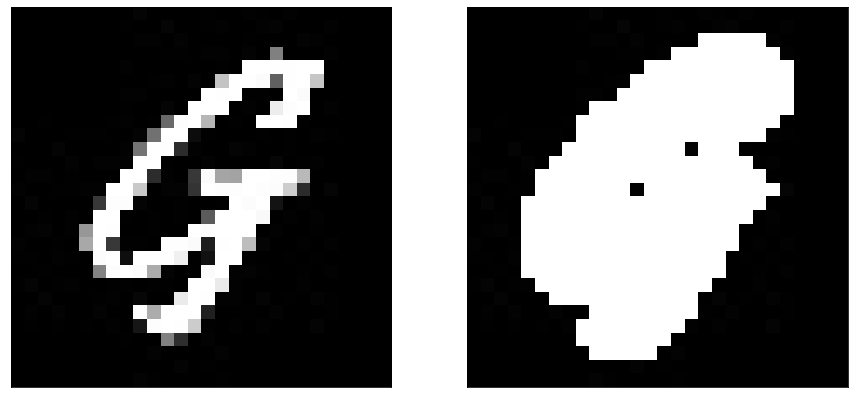

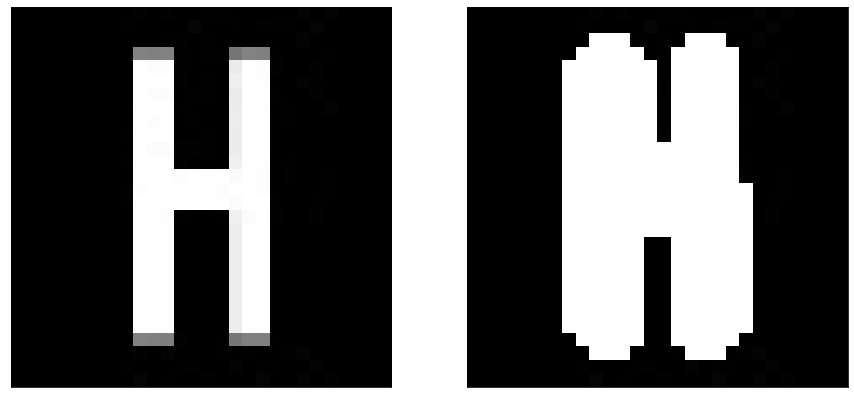

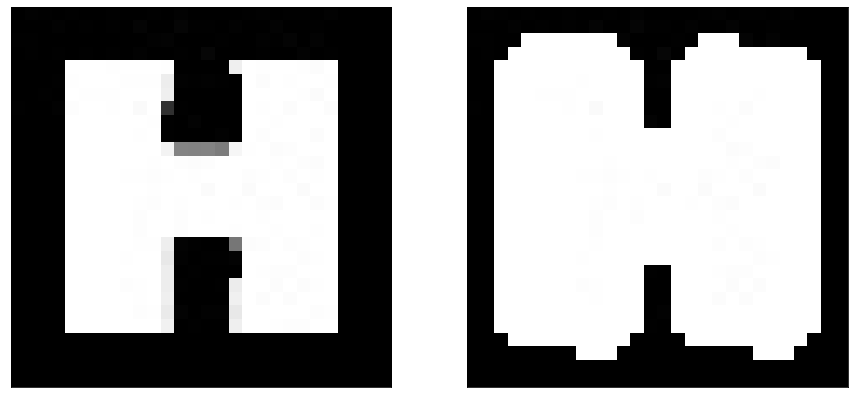

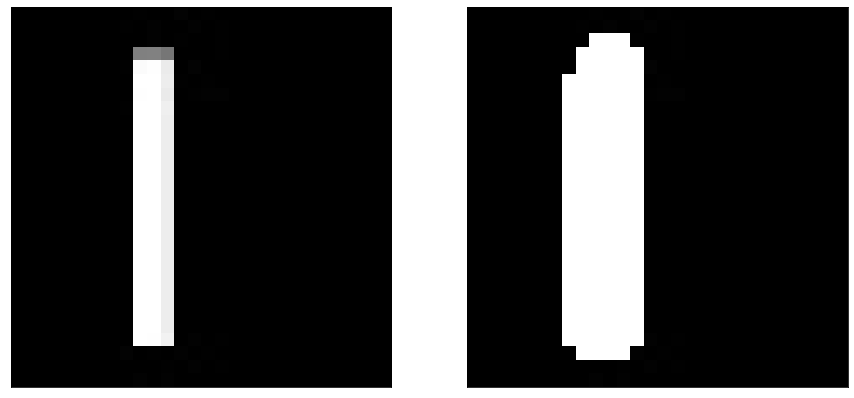

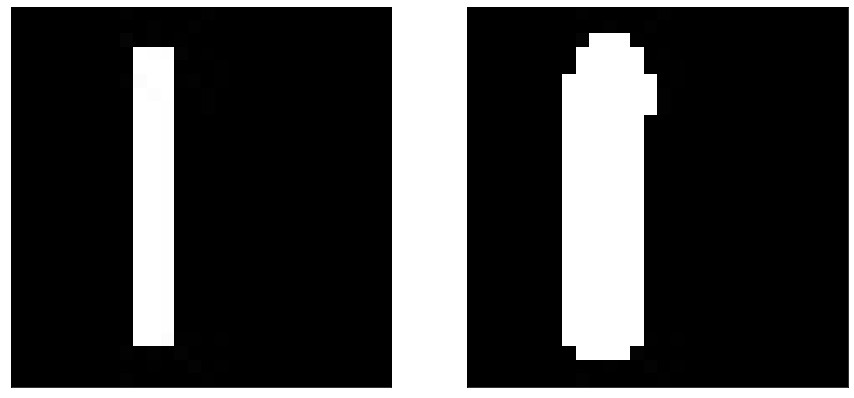

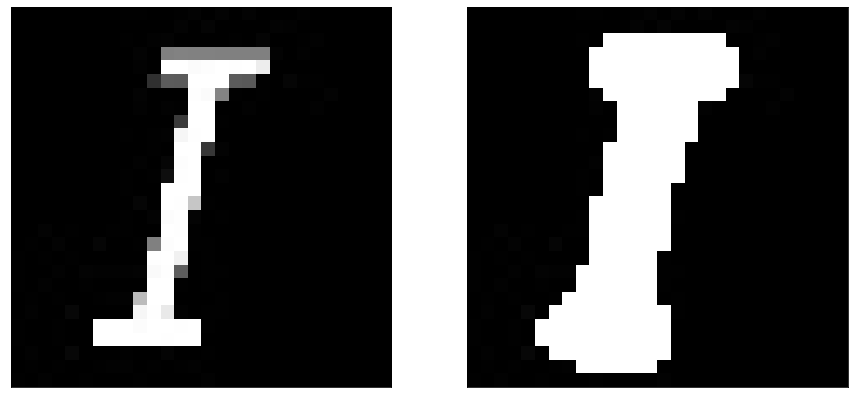

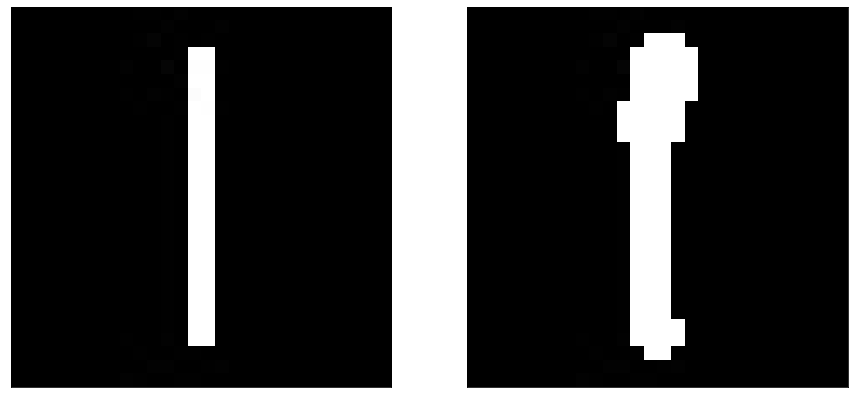

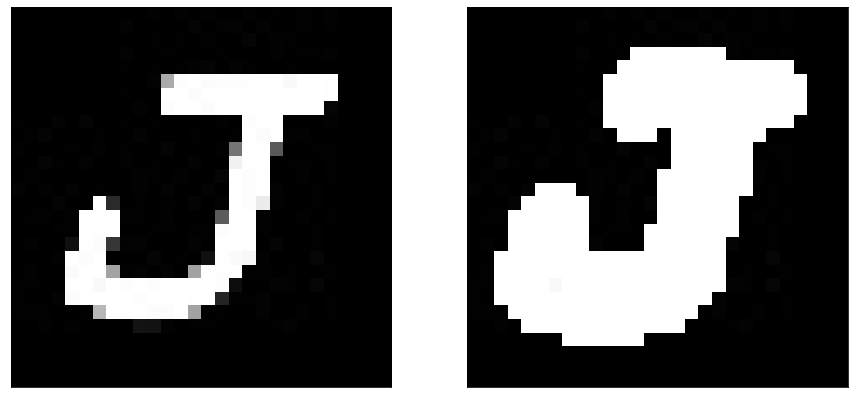

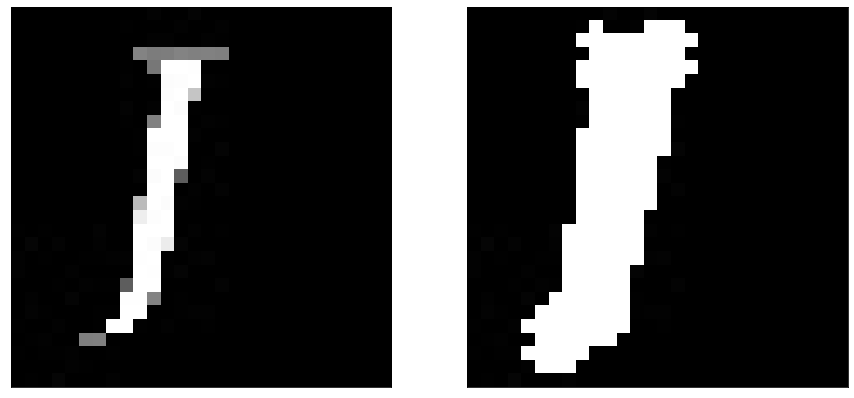

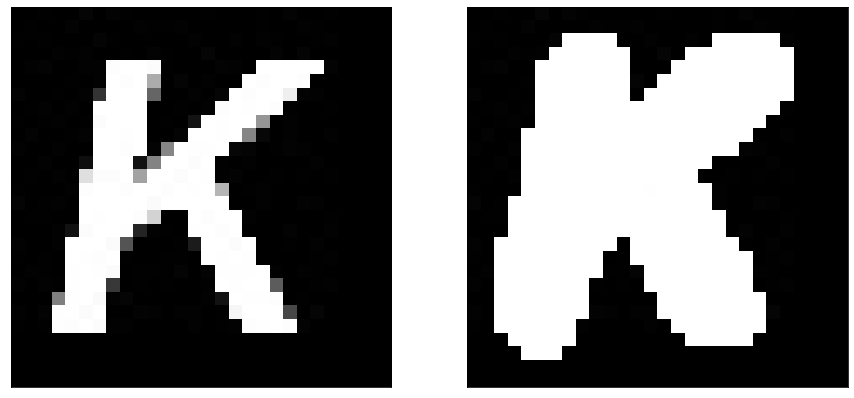

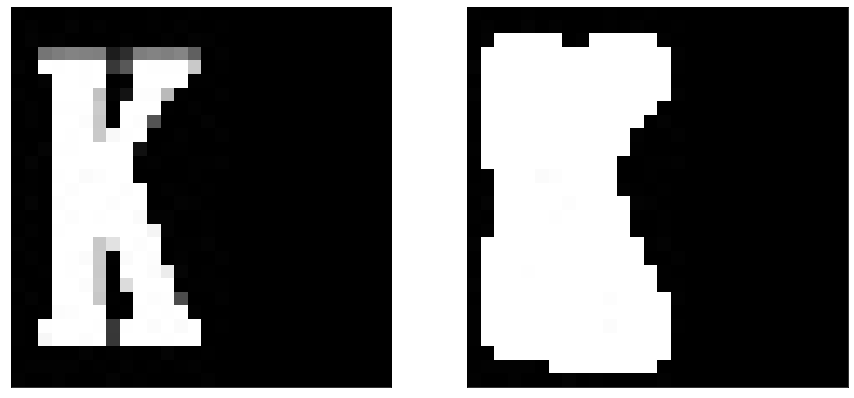

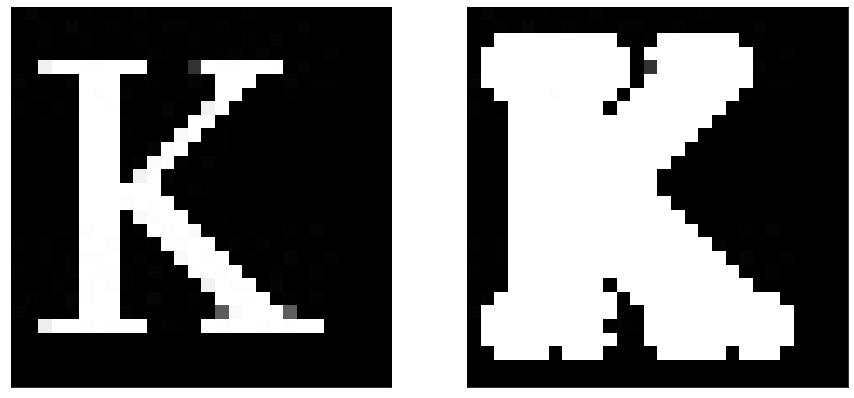

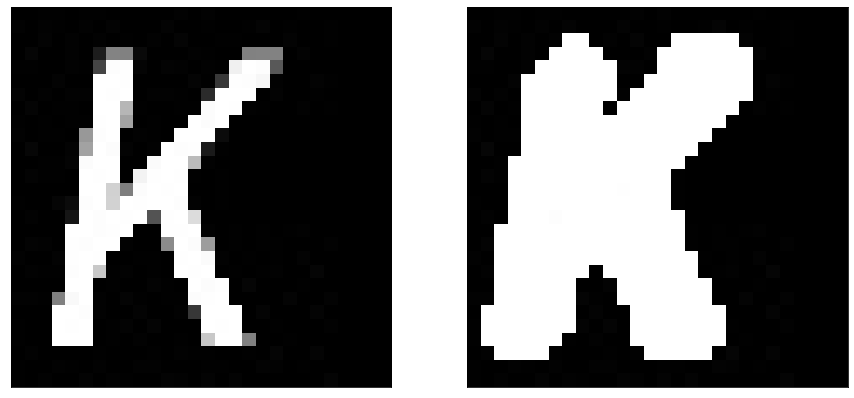

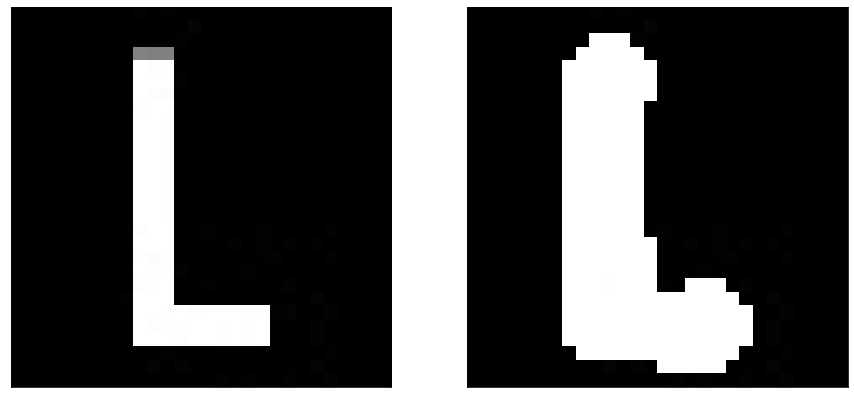

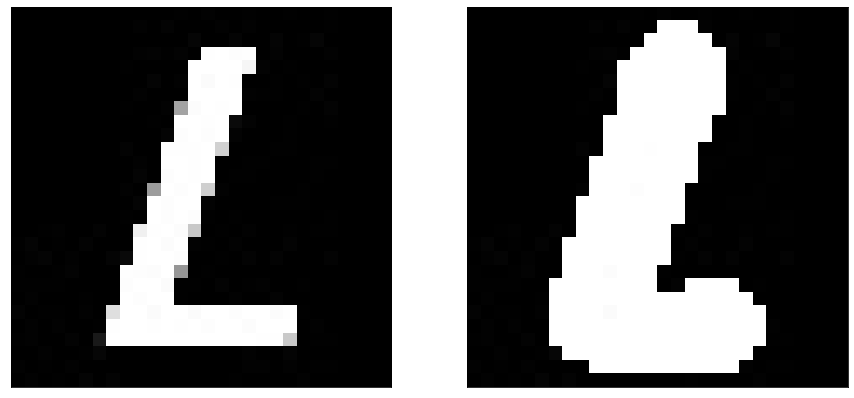

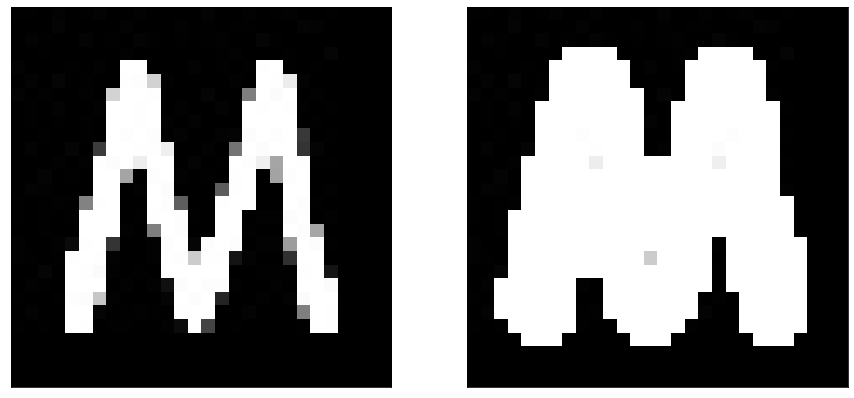

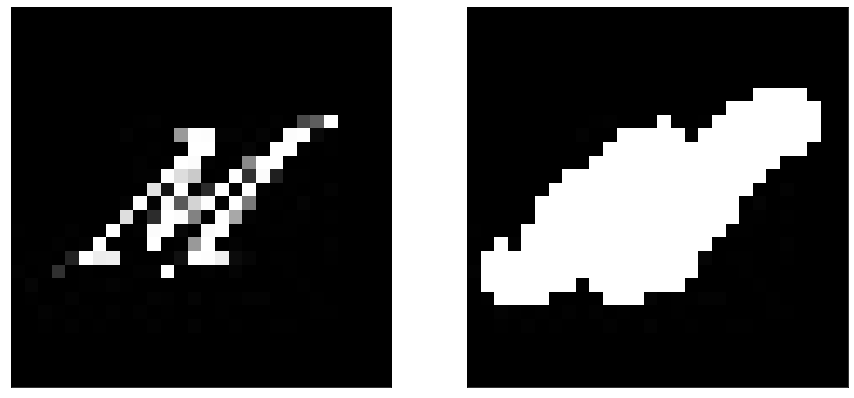

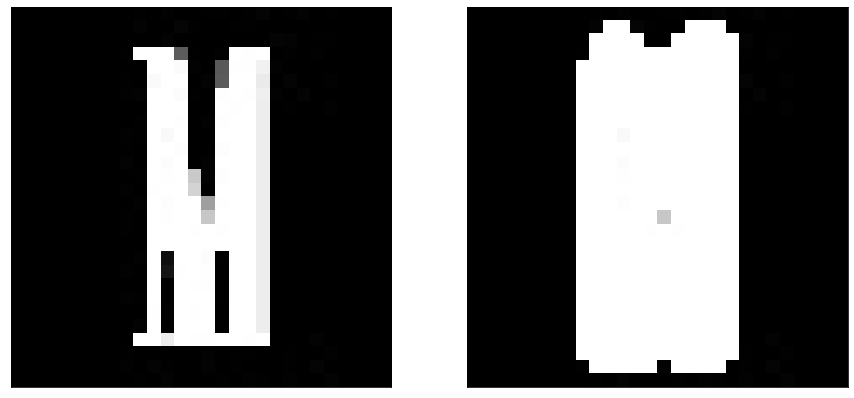

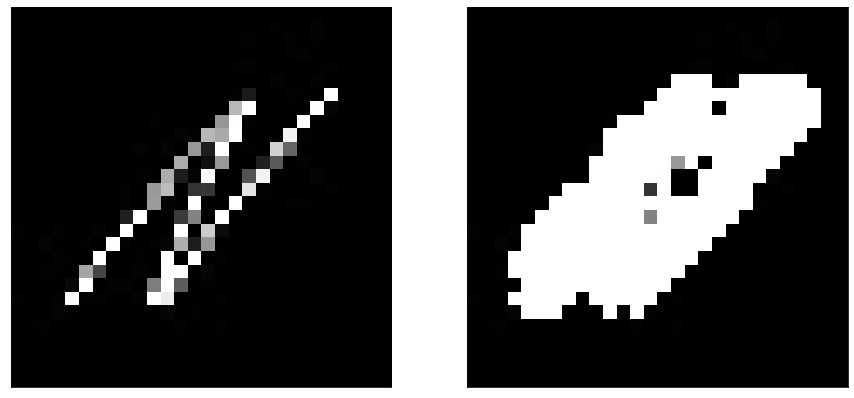

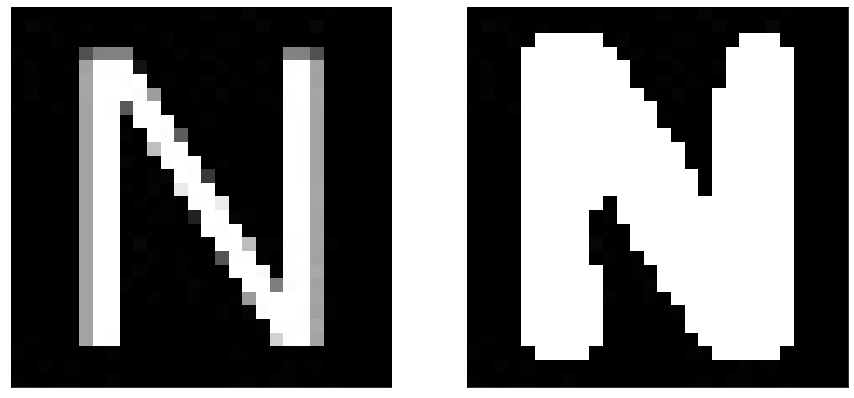

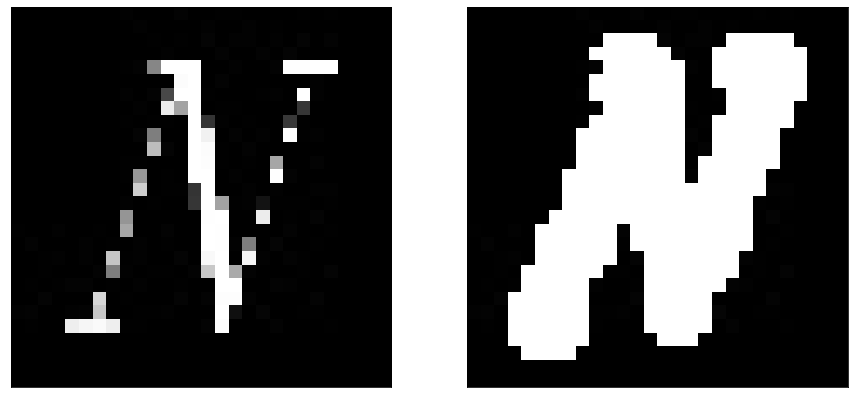

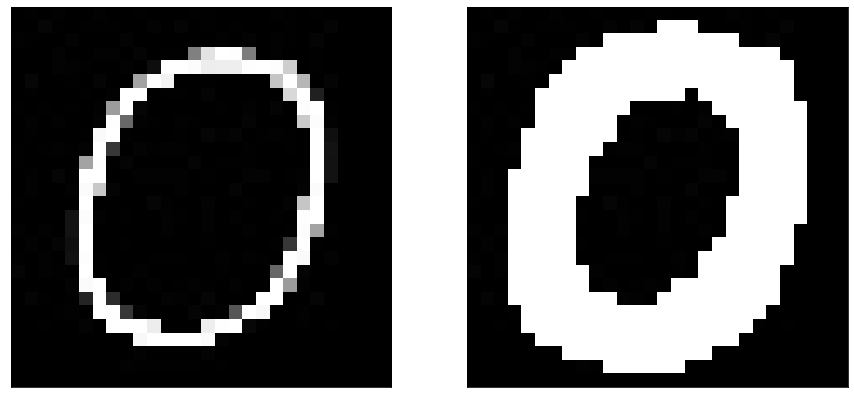

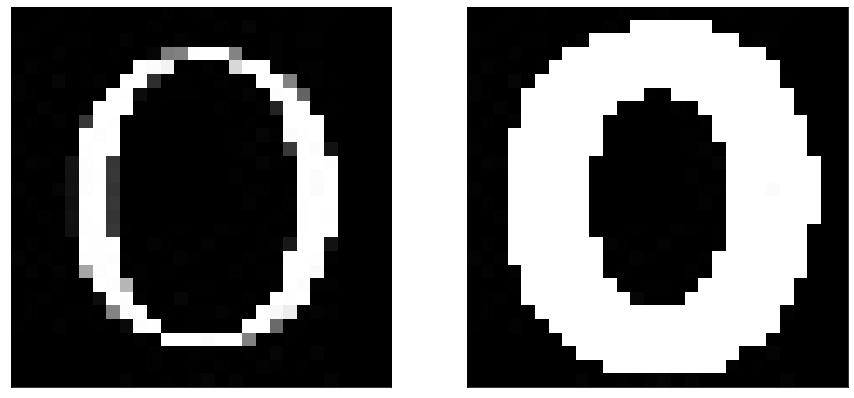

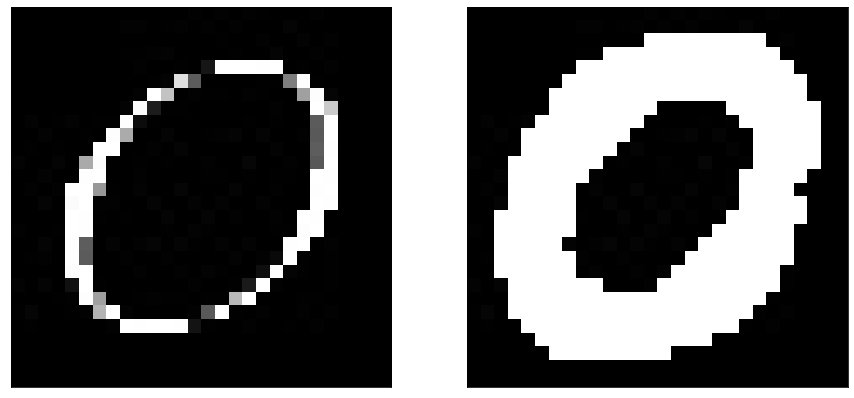

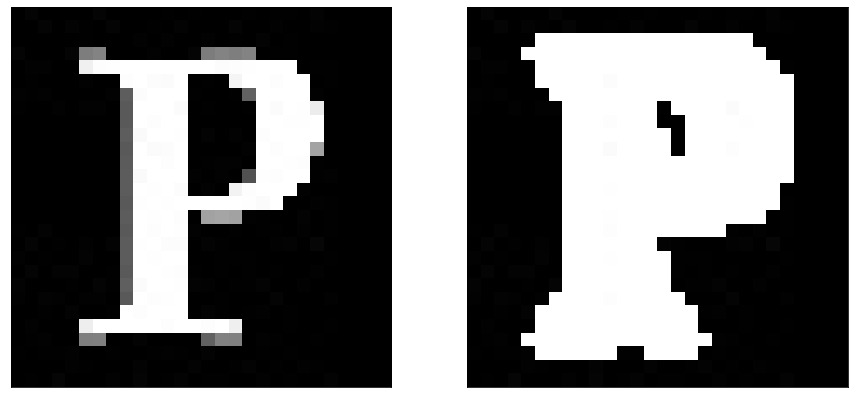

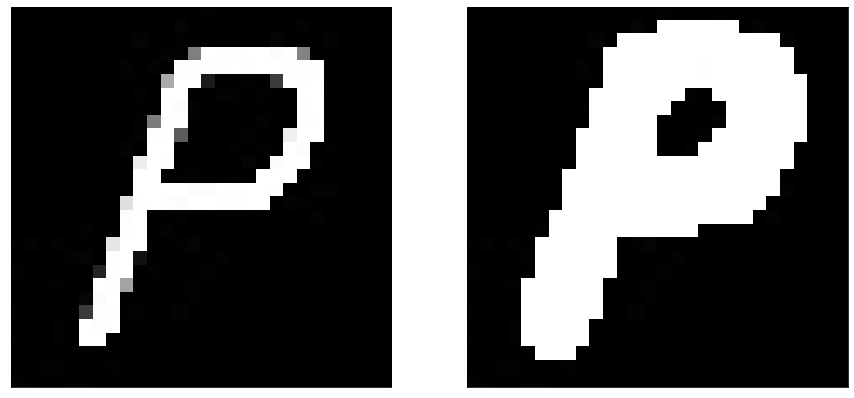

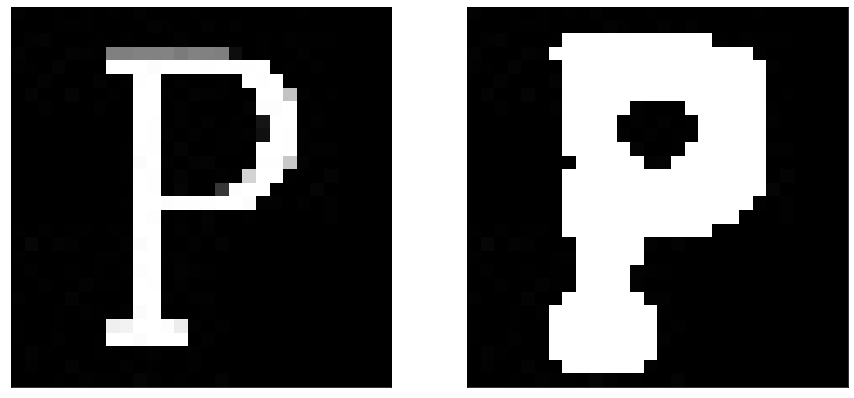

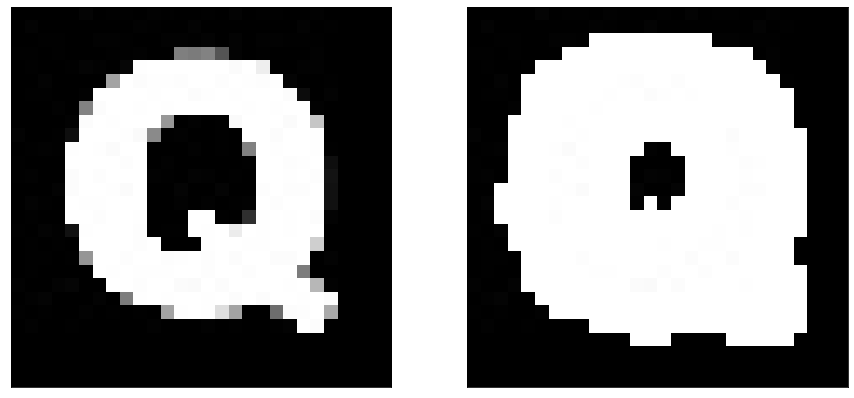

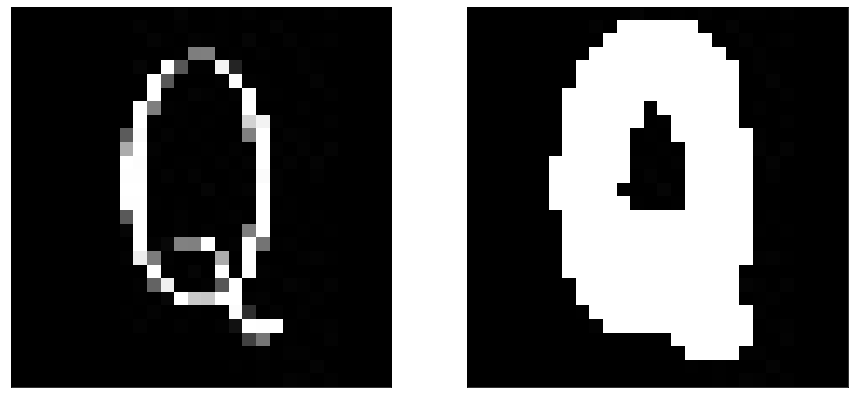

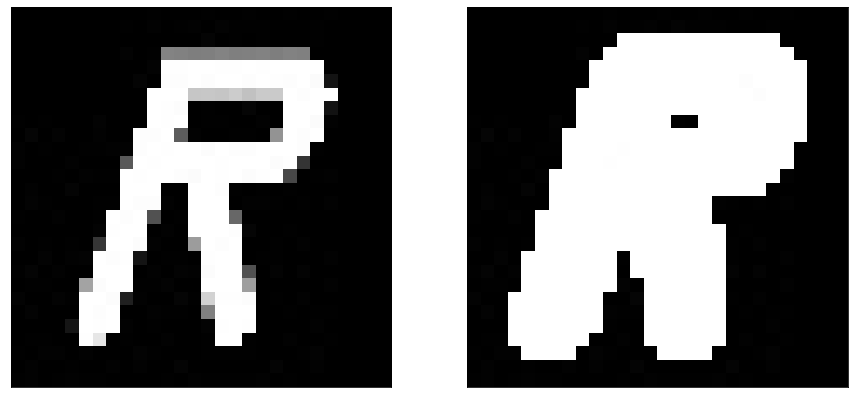

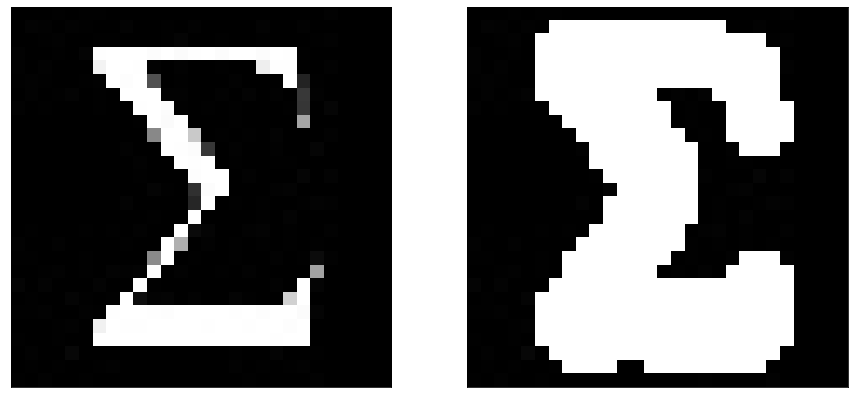

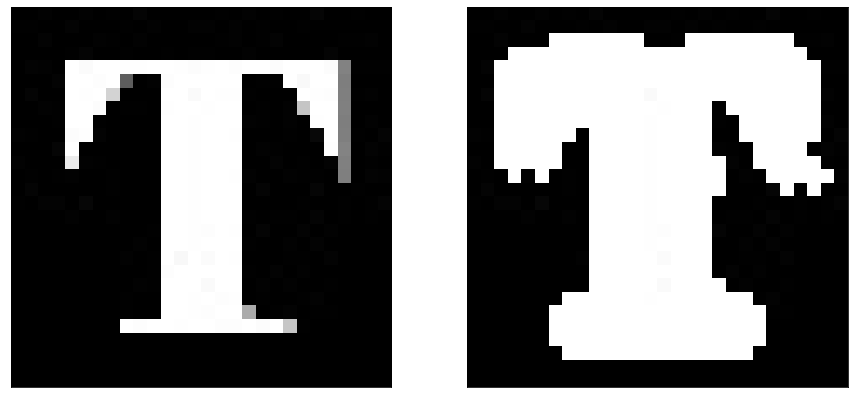

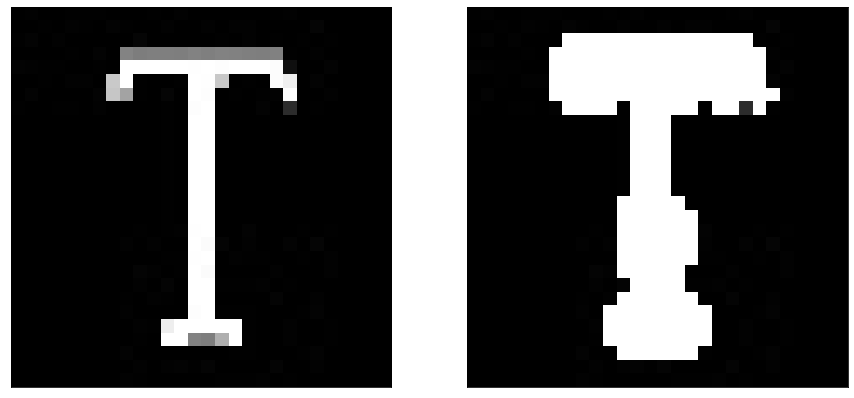

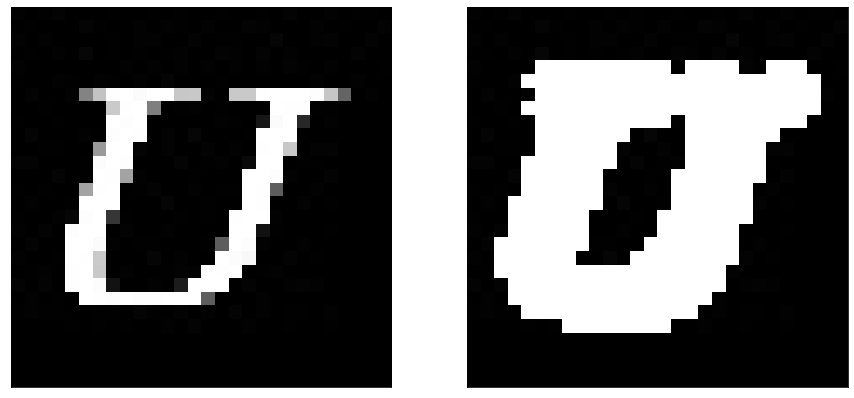

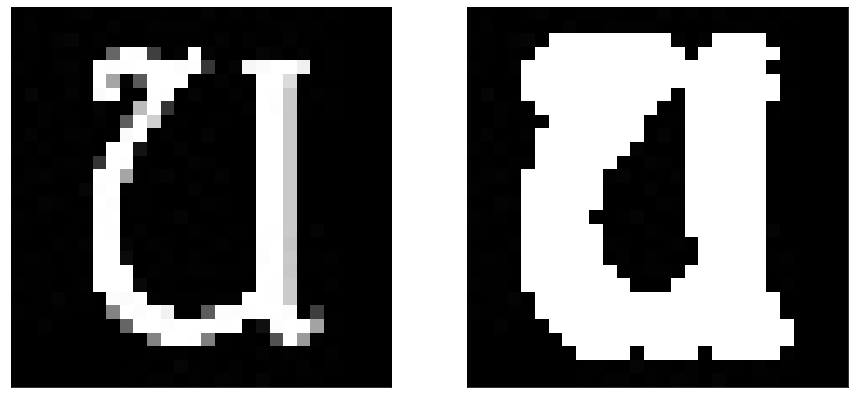

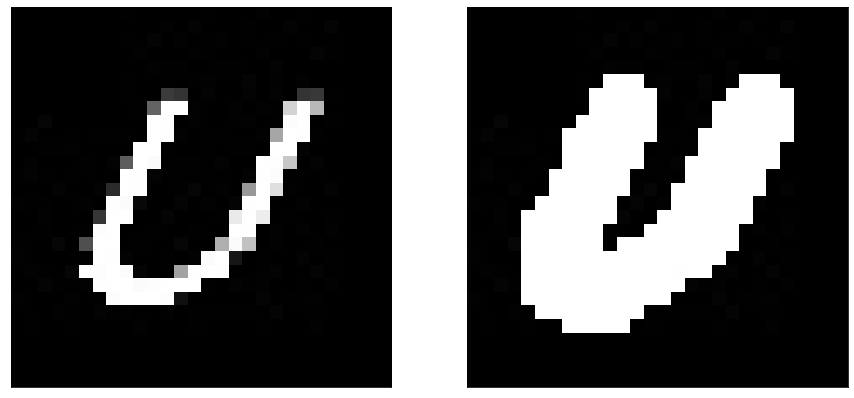

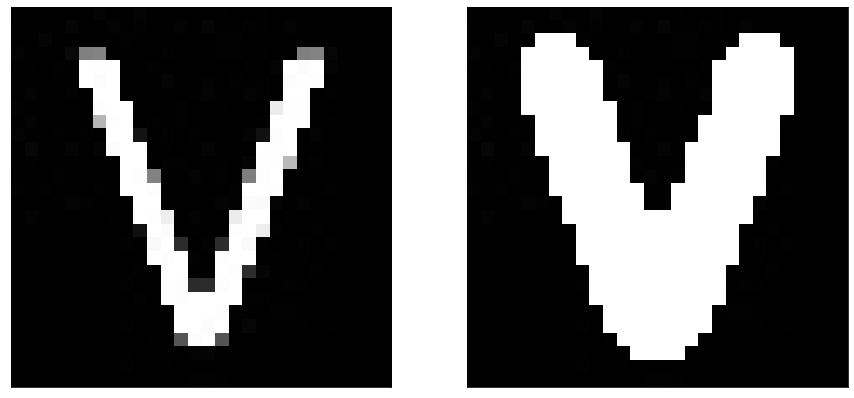

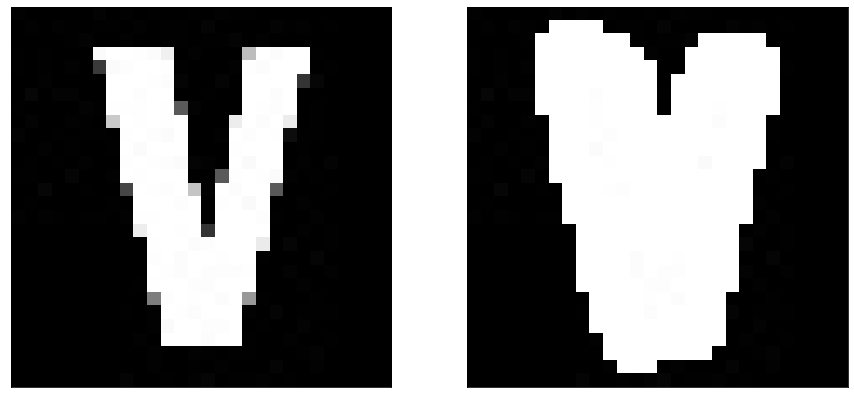

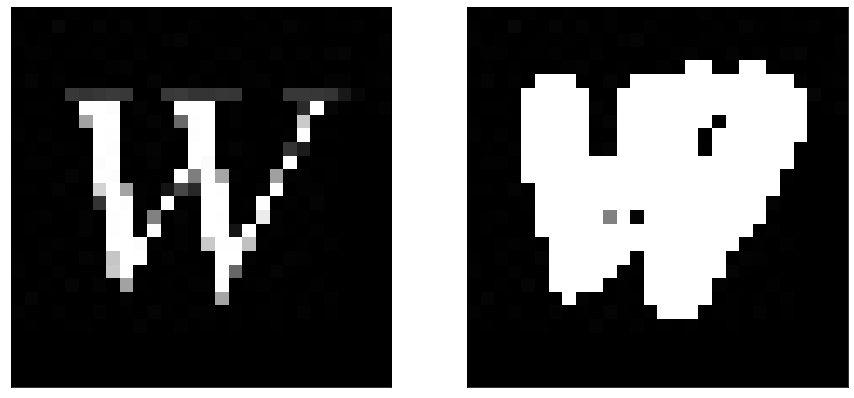

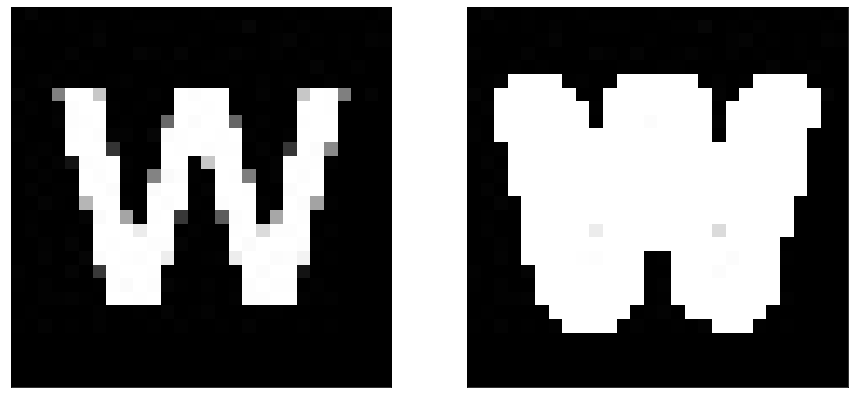

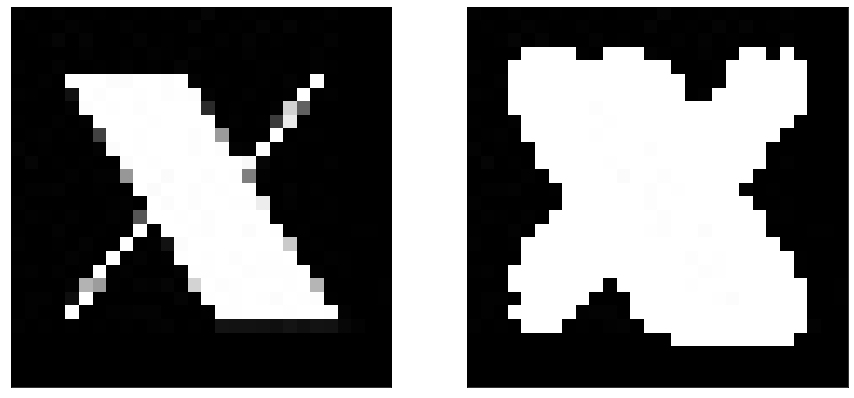

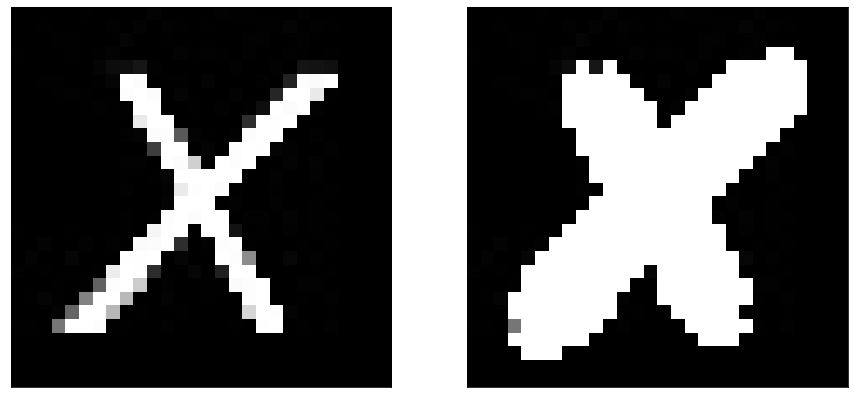

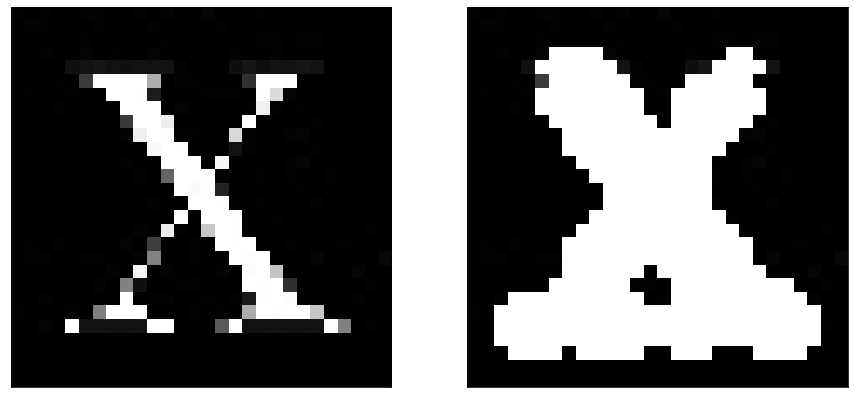

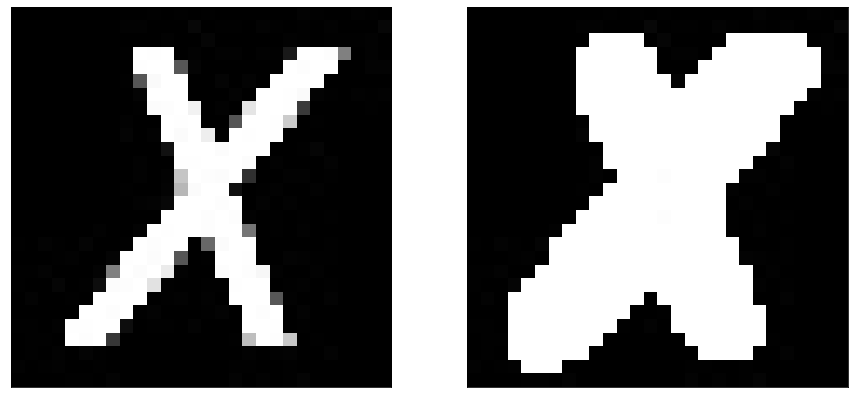

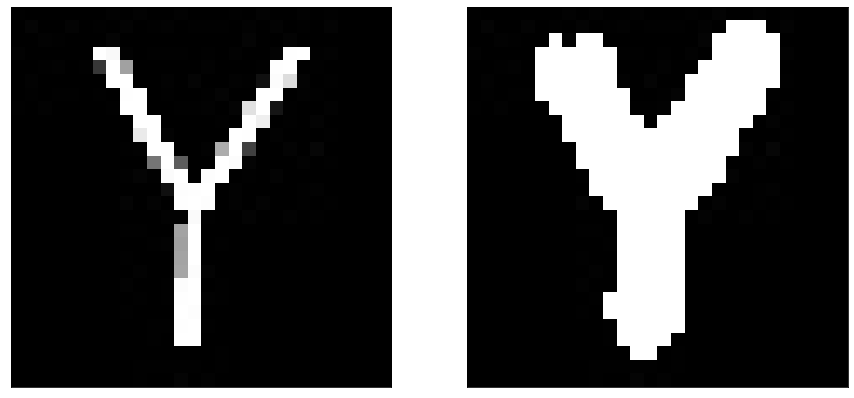

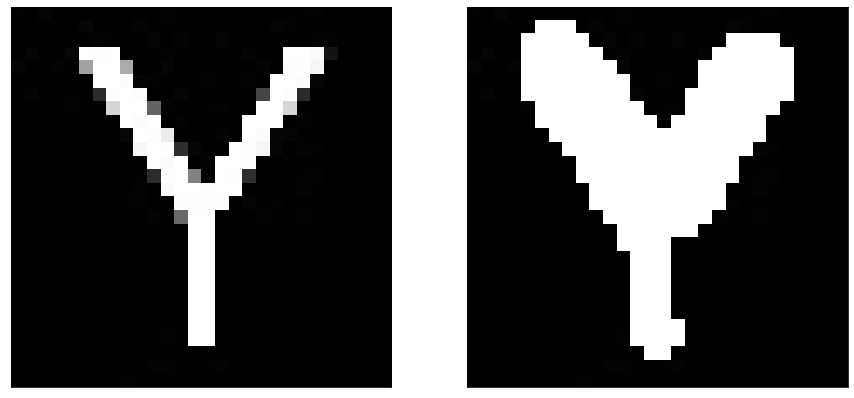

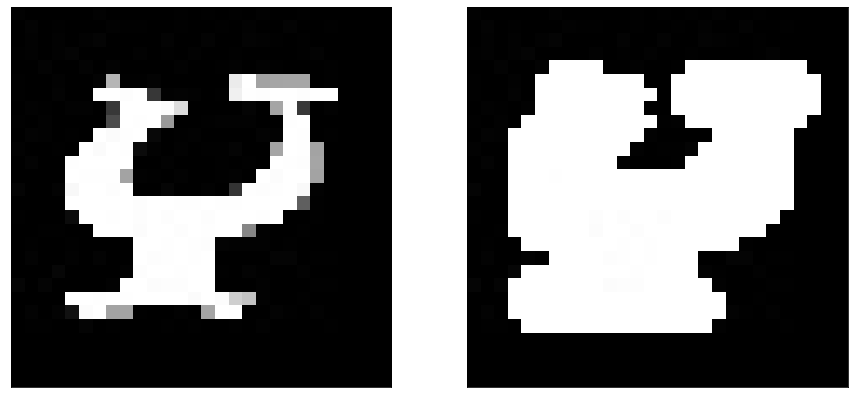

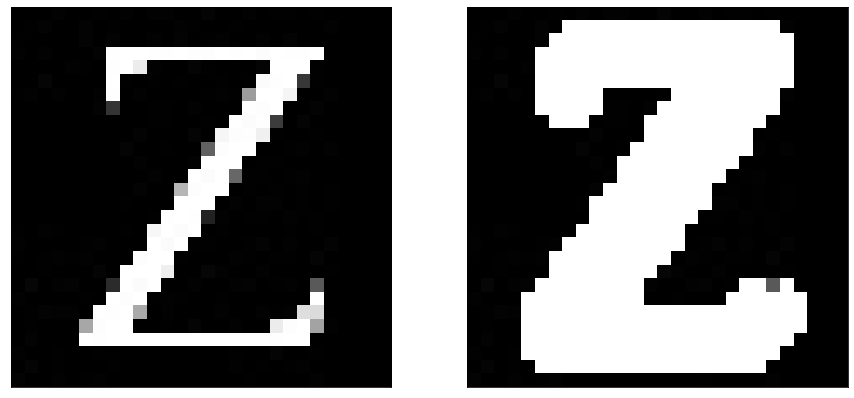

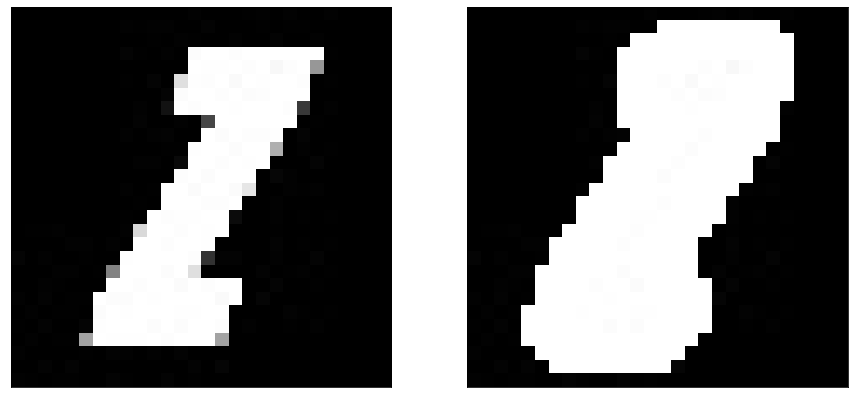

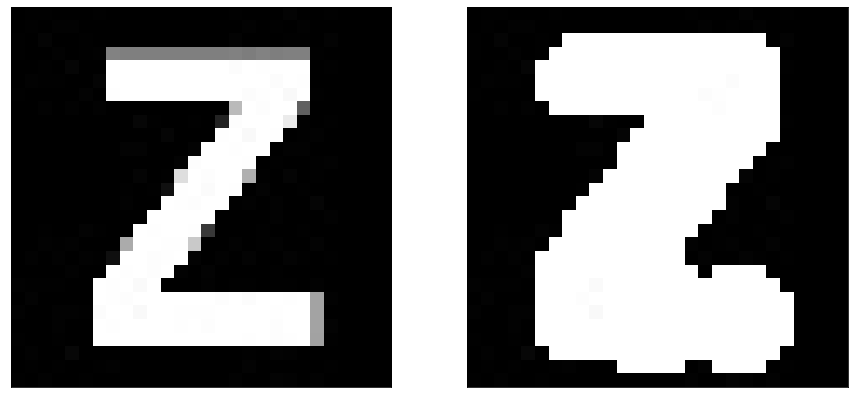

In [262]:
for i in range(0,36575,300): 
    edges1 = cv2.Canny(data[i], 30, 200)
    cnts, new = cv2.findContours(edges1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image_copy = data[i].copy()
    _ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
    plot_images(data[i], image_copy)

Our target data contain the value from 0 to 9 and A to Z.

In [275]:
labels

array(['0', '0', '0', ..., 'Z', 'Z', 'Z'], dtype='<U1')

Sometime, image data have diffrent size like some images are in landscape and some are in portrait so, its good to check the size of the image. if its is not equal than we have to reshape the images. <br>
But, here,we get all images <b>28x28</b>. So we do not need to reshape it.

In [182]:
for i in range(0,36575,200):    
    print(data[i].shape)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(

Just look at image dimensions, confirm it's weather the images is byte <b>scaled</b> (0-255).
Here, we got min value 0 and max value 255.

In [253]:
for i in range(0,36575,200):    
    print(np.min(data[i]),np.max(data[i]))

0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 240
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 255
0 25

Here, we checked the shape of the data and we got 36576 rows(images) with the size of 28x28.

In [17]:
data.shape

(36576, 28, 28)

Same with the target variable, we got 36576 rows which is equal to corresponding data.

In [18]:
labels.shape

(36576,)

Here, we just checked missing values in the data.<br>
There is no null data in the data and labels

In [185]:
pd.isnull(labels).sum()

0

In [186]:
alphabets = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [187]:
dataset_classes = []
for cls in alphabets:
    dataset_classes.append([cls])

In [149]:
label_list = []
for i in labels:
    label_list.append([i])

# One hot encoding 

In [263]:
# One hot encoding                          As we have catagorical feature in our target variable
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(dataset_classes)
labels_ohe = ohe.transform(label_list).toarray() # So we transform the target data into binary form to get better result

In [41]:
labels_ohe            # encoded target variable

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Split the data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.20, random_state=42)

X_train = X_train.reshape(29260,28,28,1)
X_test = X_test.reshape(7316,28,28,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29260, 28, 28, 1)
(7316, 28, 28, 1)
(29260, 36)
(7316, 36)
